# Portfolioprojekt: Depression and anxiety data  (EDA-file)

The project was given from:

https://www.kaggle.com/datasets/shahzadahmad0402/depression-and-anxiety-data/code


***
We have the following tasks:
* Data reading and cleaning,
* first Feature Engineering,
* Base model, fit the dates to the model,
* Combination to the pipeline,
* Model interpretation.
***

The data-set is given with th columns

| **Column** | **Description** |
| ------------ | :-----------------: |
| id | each number is a participant in the experiment |
| school_year | years in school |
| age | |
| gender | |
| bmi | body mass index |
| who_bmi | bmi category |
| phq_score | measure the severity of symptoms related to depression, anxiety, and other related disorders in patients |
| depression_severity | degree or intensity of symptoms experienced by an individual with depression |
| depressiveness | |
| suicidal | the candidate have suicide thought |
| depression_diagnosis | the candidate already have depression diagnosis |
| depression_treatment | the candidate already have depression treatment |
| gad_score | measure that assesses the severity of Generalized Anxiety Disorder |
| anxiety_severity |  intensity of symptoms experienced by an individual with anxiety |
| anxiousness | |
| anxiety_diagnosis | the candidate already have anxiety diagnosis |
| anxiety_treatment | the candidate already have anxiety treatment |
| epworth_score |  score to assess daytime sleepiness ytime sleepiness |
| sleepiness | |

# EDA in Power-BI:
We saw, that the column: pdh_score is very strong related to depressiveness (means: score >= 9 is depressive, score < 9 no depressive), further the depression_severity is also strong related to the depressiveness, such that we skip this 2 columns

**Szenario:** 
Based on the target 'depressivenes', we apply the EDA and a first base-model with logging and grid-search.

We deal with a given csv-file and split it into a train + test dataset to apply the fit and prediction.
Further, we have a data-cleaning, which ste the correct types and cleaned with NaN entries.

## Preparation

We solve the following problem: Prediction of depressiveness given with important featurs: This is done by
* Preparation of the dataset
* Problem is based as a classification problem, which can be done with logistic regression, random forest, KNN, decision-tree
* We apply the model to an aim-data set and predit, if a person has a tendency to depression or not
* We like to built an app for a clinical application or an application for a Universities to see, if their students have some tendencises
* We apply given datasets of a clinical study

### Define Metric

We apply the F1-matric to get a balance between the precision and recall.

In [132]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score


# Metrics considerations

# Accuracy: The proportion of correct predictions. 
            # In your case this metric might be less important, 
           # I may have an unbalanced dataset (more good purchases than bad purchases).
# Better metrics
# Recall (Sensitivity): The proportion of correctly identified bad purchases out of all 
# actual bad purchases. Here I optimize: Identify as many bad purchases as possible.
# Precision: The proportion of correctly identified bad purchases out of all as bad purchases 
# predicted cars. Important to minimize false purchases.
# It is best to weight between the two:
# F1-Score: The harmonic mean of precision and recall. 
# Here I have to find a balance between precision and recall.

# We apply the F1-score

### Gather Data

We have the dataset: *depression_anxiety_data.csv*. With the target-column: 'depressiveness

In [133]:
# import modules 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Modelle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Pipeline
from sklearn.pipeline import Pipeline
# Columntransormer
from sklearn.compose import ColumnTransformer
# OneHotEndode,, Scaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Train/Test Splitt, Crossvaue-Score, SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

In [134]:

# read data (start from the dataset)
df = pd.read_csv("data/depression_anxiety_data.csv")

display(df.head())
#print(df)

id  school_year  age  gender        bmi          who_bmi  phq_score  \
0   1            1   19    male  33.333333  Class I Obesity          9   
1   2            1   18    male  19.841270           Normal          8   
2   3            1   19    male  25.102391       Overweight          8   
3   4            1   18  female  23.738662           Normal         19   
4   5            1   18    male  25.617284       Overweight          6   

  depression_severity depressiveness suicidal depression_diagnosis  \
0                Mild          False    False                False   
1                Mild          False    False                False   
2                Mild          False    False                False   
3   Moderately severe           True     True                False   
4                Mild          False    False                False   

  depression_treatment  gad_score anxiety_severity anxiousness  \
0                False         11         Moderate        True   
1                False          5             Mild       False   
2                False          6             Mild       False   
3                False         15           Severe        True   
4                False         14         Moderate        True   

  anxiety_diagnosis anxiety_treatment  epworth_score sleepiness  
0             False             False            7.0      False  
1             False             False           14.0       True  
2             False             False            6.0      False  
3             False             False           11.0       True  
4             False             False            3.0      False

## EDA

### Understand Data

Mach dich zu Beginn mit den Daten vertraut, damit du später bei der Datenbereinigung und -aufbereitung weißt, worauf du achten solltest.

**Tipp**: Die Spalte `'PurchDate'` ist als Unix-Timestamp in ganzen Sekunden angegeben. Um diese Spalte mit `pandas` in ein Datumsformat umzuwandeln, kannst du folgenden Code nutzen: `my_df.loc[:, 'PurchDate'] = pd.to_datetime(my_df.loc[:, 'PurchDate'], unit='s')`

In [135]:


# 1. See the datatypes
print("\nDatatypes of the column:")
display(df.dtypes)

# 2. Statistical description

print("\n Statistical Description:")
display(df.describe())



Datatypes of the column:


id                        int64
school_year               int64
age                       int64
gender                   object
bmi                     float64
who_bmi                  object
phq_score                 int64
depression_severity      object
depressiveness           object
suicidal                 object
depression_diagnosis     object
depression_treatment     object
gad_score                 int64
anxiety_severity         object
anxiousness              object
anxiety_diagnosis        object
anxiety_treatment        object
epworth_score           float64
sleepiness               object
dtype: object


 Statistical Description:


id  school_year         age         bmi   phq_score  \
count  783.000000   783.000000  783.000000  783.000000  783.000000   
mean   392.000000     2.277139   20.233716   23.420533    7.123883   
std    226.176922     1.163633    1.767217    4.563630    4.426580   
min      1.000000     1.000000   18.000000    0.000000    0.000000   
25%    196.500000     1.000000   19.000000   20.989420    4.000000   
50%    392.000000     2.000000   20.000000   23.140496    6.000000   
75%    587.500000     3.000000   21.000000   25.519924    9.000000   
max    783.000000     4.000000   31.000000   54.552668   24.000000   

        gad_score  epworth_score  
count  783.000000     775.000000  
mean     6.810983       6.376774  
std      4.727352       3.996443  
min      0.000000       0.000000  
25%      3.000000       3.500000  
50%      6.000000       6.000000  
75%      9.000000       9.000000  
max     21.000000      32.000000

In [136]:
#check NaNs and duplicates
print('Index')
print('index_size', df.index.size)
print('Columns with NaN')
print('is NaN', df.isna().sum())
print('Duplicates in Columns')
print('duplicated', df.duplicated().sum())
#note: no NaNs, no duplicates, no cleaning required

Index
index_size 783
Columns with NaN
is NaN id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64
Duplicates in Columns
duplicated 0


In [137]:
# Exists duplicates
duplicates = df[df.duplicated()]
print("Show duplicates:")
print(duplicates)

# Clean duplicates
df_clean = df.drop_duplicates()

# Optional: Do we have duplicates
print("Overview, if duplicates after cleaning:")
print('duplicated', df_clean.duplicated().sum())


Show duplicates:
Empty DataFrame
Columns: [id, school_year, age, gender, bmi, who_bmi, phq_score, depression_severity, depressiveness, suicidal, depression_diagnosis, depression_treatment, gad_score, anxiety_severity, anxiousness, anxiety_diagnosis, anxiety_treatment, epworth_score, sleepiness]
Index: []
Overview, if duplicates after cleaning:
duplicated 0


In [138]:
# Consider the important columns
columns_of_interest = [
    'gender', 'who_bmi', 'depression_severity', 'depressiveness', 'suicidal', 
    'depression_diagnosis', 'depression_treatment', 'anxiety_severity', 
    'anxiousness', 'anxiety_diagnosis', 'anxiety_treatment', 'epworth_score', 
    'sleepiness'
]

# Show the unique values of each column
for column in columns_of_interest:
    unique_values = df[column].unique()
    print(f"Unique columns '{column}':")
    print(unique_values)
    print()




Unique columns 'gender':
['male' 'female']

Unique columns 'who_bmi':
['Class I Obesity' 'Normal' 'Overweight' 'Not Availble'
 'Class III Obesity' 'Underweight' 'Class II Obesity']

Unique columns 'depression_severity':
['Mild' 'Moderately severe' 'None-minimal' 'Moderate' nan 'Severe' 'none']

Unique columns 'depressiveness':
[False True nan]

Unique columns 'suicidal':
[False True nan]

Unique columns 'depression_diagnosis':
[False True nan]

Unique columns 'depression_treatment':
[False True nan]

Unique columns 'anxiety_severity':
['Moderate' 'Mild' 'Severe' 'None-minimal' '0']

Unique columns 'anxiousness':
[True False nan]

Unique columns 'anxiety_diagnosis':
[False True nan]

Unique columns 'anxiety_treatment':
[False True nan]

Unique columns 'epworth_score':
[ 7. 14.  6. 11.  3.  2.  5.  9.  4.  1.  0.  8. nan 13. 10. 12. 18. 17.
 15. 16. 31. 24. 32. 20. 19.]

Unique columns 'sleepiness':
[False True nan]



In [139]:
# Modells with targets and features

# Target columns (later we put 'depression_treatment', 'anxiety_treatment' together to 'treatment_status')

target_cols =['anxiousness', 'depressiveness', 'depression_treatment', 'anxiety_treatment', 'suicidal']

# first all numerical columns

num_cols =  ['school_year', 'age', 'bmi', 'phq_score', 'gad_score', 'epworth_score' ]


# categorical columns, which can be transformed simple to numerical columns (only true/false entires)

cat_cols_trans = ['gender', 'depression_diagnosis', 'depression_treatment',  'anxiety_diagnosis', 'sleepiness']


# We have 3 catergoical columns with more that 2 entries:

cat_cols = ['who_bmi', 'anxiety_severity', 'depressiv_severity']


In [140]:
# Clean the Datatypes:


# Drop all NaNs (we have ony a few NaNs in the columns): 
df = df.dropna()


# Correct Datatypes of the target:
# and the feature gender (both int)

df.gender = df.gender.map({'male':1, 'female':0})


# Define the targets:
#1.) anxiousness:  Prediction:  0: False (no anxious) / 1: True (anxious)
#2.) depressiveness: Prediction: 0: False (no depression) / 1: True (depression)
#3.) will_get_treatment: Prediction: 0: False (no get-treatement) / 1: True (get-treatment)
#4.) suicidality: Prediction: 0: False (no suicidality) / 1: True (suicidality)

df['anxiousness'] = df['anxiousness'].astype(int)
df['depressiveness'] = df['depressiveness'].astype(int)

df['treatment_status'] = df['depression_treatment'] | df['anxiety_treatment']
df['treatment_status'] = df['treatment_status'].astype(int)


df['suicidal'] = df['suicidal'].astype(int)

# Change the binary categorial feature variables into numerical 

# Convert binary categorical features to integer

# List of categorical columns with binary values that need to be converted to integers
cat_cols_trans = ['gender', 'depression_diagnosis', 'depression_treatment',  
                      'anxiety_diagnosis', 'sleepiness']

df[cat_cols_trans] = df[cat_cols_trans].astype(int)


df['anxiety_treatment'] = df['anxiety_treatment'].astype(int)

# Describe the dates
display(df.describe())

id  school_year         age      gender         bmi  \
count  765.000000   765.000000  765.000000  765.000000  765.000000   
mean   394.487582     2.288889   20.257516    0.484967   23.410511   
std    226.055561     1.167377    1.772488    0.500101    4.590204   
min      1.000000     1.000000   18.000000    0.000000    0.000000   
25%    199.000000     1.000000   19.000000    0.000000   20.957274   
50%    395.000000     2.000000   20.000000    0.000000   23.148148   
75%    591.000000     3.000000   21.000000    1.000000   25.510204   
max    783.000000     4.000000   31.000000    1.000000   54.552668   

        phq_score  depressiveness    suicidal  depression_diagnosis  \
count  765.000000      765.000000  765.000000            765.000000   
mean     7.167320        0.267974    0.084967              0.086275   
std      4.420411        0.443194    0.279015              0.280953   
min      0.000000        0.000000    0.000000              0.000000   
25%      4.000000        0.000000    0.000000              0.000000   
50%      6.000000        0.000000    0.000000              0.000000   
75%      9.000000        1.000000    0.000000              0.000000   
max     24.000000        1.000000    1.000000              1.000000   

       depression_treatment   gad_score  anxiousness  anxiety_diagnosis  \
count            765.000000  765.000000   765.000000         765.000000   
mean               0.074510    6.882353     0.248366           0.079739   
std                0.262771    4.730071     0.432348           0.271065   
min                0.000000    0.000000     0.000000           0.000000   
25%                0.000000    3.000000     0.000000           0.000000   
50%                0.000000    6.000000     0.000000           0.000000   
75%                0.000000    9.000000     0.000000           0.000000   
max                1.000000   21.000000     1.000000           1.000000   

       anxiety_treatment  epworth_score  sleepiness  treatment_status  
count         765.000000     765.000000  765.000000        765.000000  
mean            0.077124       6.396078    0.183007          0.108497  
std             0.266963       3.998198    0.386925          0.311210  
min             0.000000       0.000000    0.000000          0.000000  
25%             0.000000       4.000000    0.000000          0.000000  
50%             0.000000       6.000000    0.000000          0.000000  
75%             0.000000       9.000000    0.000000          0.000000  
max             1.000000      32.000000    1.000000          1.000000

In [141]:

# Durch jede Spalte iterieren und die Verteilung der Werte anzeigen
for column in columns_of_interest:
    value_counts = df[column].value_counts()
    print(f"Verteilung der Werte in der Spalte '{column}':")
    print(value_counts)
    print()

Verteilung der Werte in der Spalte 'gender':
gender
0    394
1    371
Name: count, dtype: int64

Verteilung der Werte in der Spalte 'who_bmi':
who_bmi
Normal               497
Overweight           189
Underweight           35
Class I Obesity       27
Not Availble           8
Class II Obesity       5
Class III Obesity      4
Name: count, dtype: int64

Verteilung der Werte in der Spalte 'depression_severity':
depression_severity
Mild                 339
None-minimal         221
Moderate             136
Moderately severe     42
none                  15
Severe                12
Name: count, dtype: int64

Verteilung der Werte in der Spalte 'depressiveness':
depressiveness
0    560
1    205
Name: count, dtype: int64

Verteilung der Werte in der Spalte 'suicidal':
suicidal
0    700
1     65
Name: count, dtype: int64

Verteilung der Werte in der Spalte 'depression_diagnosis':
depression_diagnosis
0    699
1     66
Name: count, dtype: int64

Verteilung der Werte in der Spalte 'depression_treatm

In [142]:
# Clean the data and correctionof the types

print("\nDatentypen der Spalten:")
display(df.dtypes)

  


Datentypen der Spalten:


id                        int64
school_year               int64
age                       int64
gender                    int32
bmi                     float64
who_bmi                  object
phq_score                 int64
depression_severity      object
depressiveness            int32
suicidal                  int32
depression_diagnosis      int32
depression_treatment      int32
gad_score                 int64
anxiety_severity         object
anxiousness               int32
anxiety_diagnosis         int32
anxiety_treatment         int32
epworth_score           float64
sleepiness                int32
treatment_status          int32
dtype: object

id  school_year         age      gender         bmi  \
count  765.000000   765.000000  765.000000  765.000000  765.000000   
mean   394.487582     2.288889   20.257516    0.484967   23.410511   
std    226.055561     1.167377    1.772488    0.500101    4.590204   
min      1.000000     1.000000   18.000000    0.000000    0.000000   
25%    199.000000     1.000000   19.000000    0.000000   20.957274   
50%    395.000000     2.000000   20.000000    0.000000   23.148148   
75%    591.000000     3.000000   21.000000    1.000000   25.510204   
max    783.000000     4.000000   31.000000    1.000000   54.552668   

        phq_score  depressiveness    suicidal  depression_diagnosis  \
count  765.000000      765.000000  765.000000            765.000000   
mean     7.167320        0.267974    0.084967              0.086275   
std      4.420411        0.443194    0.279015              0.280953   
min      0.000000        0.000000    0.000000              0.000000   
25%      4.000000        0.000000    0.000000              0.000000   
50%      6.000000        0.000000    0.000000              0.000000   
75%      9.000000        1.000000    0.000000              0.000000   
max     24.000000        1.000000    1.000000              1.000000   

       depression_treatment   gad_score  anxiousness  anxiety_diagnosis  \
count            765.000000  765.000000   765.000000         765.000000   
mean               0.074510    6.882353     0.248366           0.079739   
std                0.262771    4.730071     0.432348           0.271065   
min                0.000000    0.000000     0.000000           0.000000   
25%                0.000000    3.000000     0.000000           0.000000   
50%                0.000000    6.000000     0.000000           0.000000   
75%                0.000000    9.000000     0.000000           0.000000   
max                1.000000   21.000000     1.000000           1.000000   

       anxiety_treatment  epworth_score  sleepiness  treatment_status  
count         765.000000     765.000000  765.000000        765.000000  
mean            0.077124       6.396078    0.183007          0.108497  
std             0.266963       3.998198    0.386925          0.311210  
min             0.000000       0.000000    0.000000          0.000000  
25%             0.000000       4.000000    0.000000          0.000000  
50%             0.000000       6.000000    0.000000          0.000000  
75%             0.000000       9.000000    0.000000          0.000000  
max             1.000000      32.000000    1.000000          1.000000

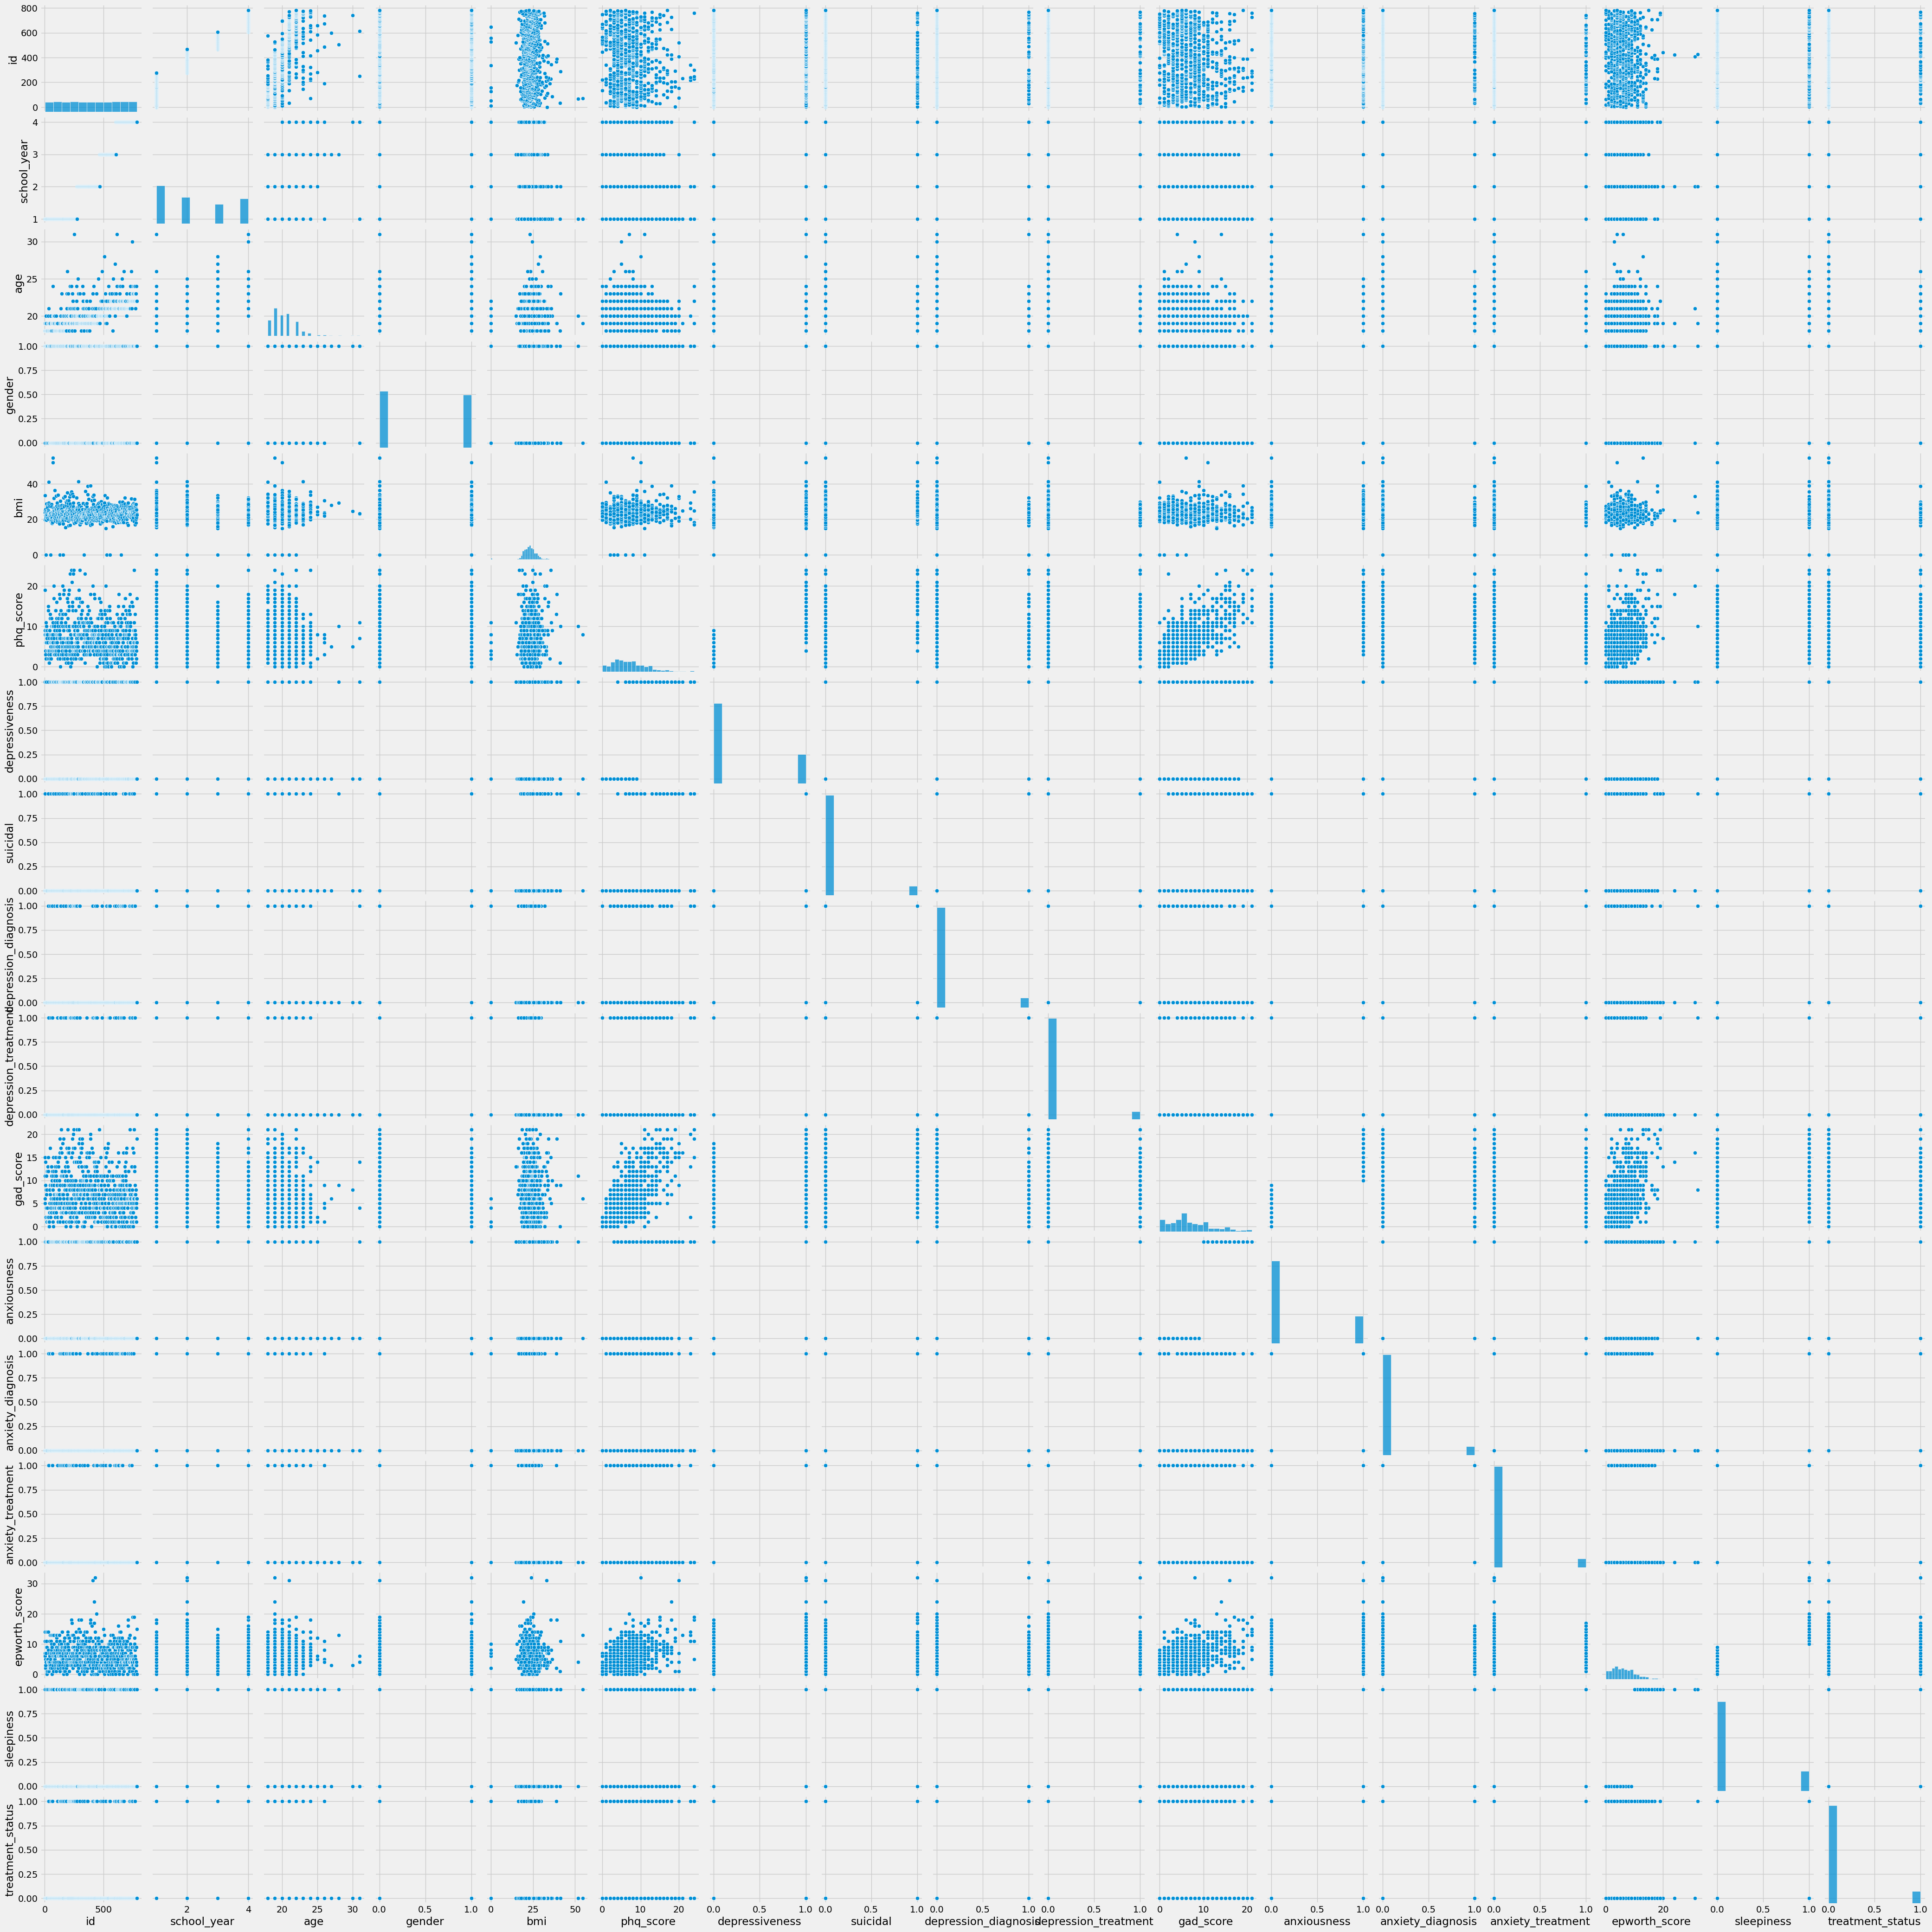

In [143]:
# check distribution of values in each feature
# Solution:
display(df.describe())
display(sns.pairplot(df))  # needs time

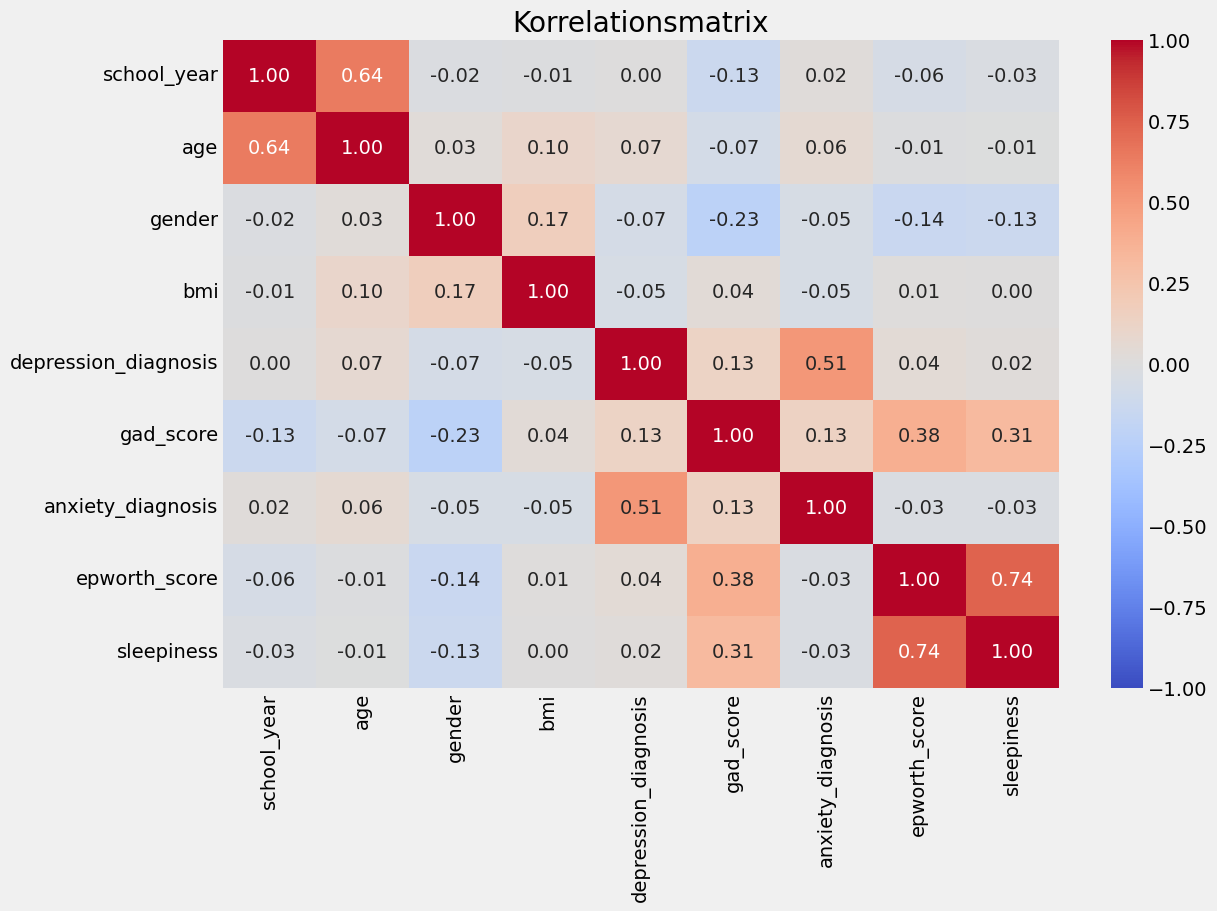

In [144]:
import seaborn as sns



# critical features, we skip to predict the 'depressiveness':   'phq_score', 'depression_severity'
num_cols = ['school_year', 'age', 'gender', 'bmi', 'depression_diagnosis', 'gad_score',
            'anxiety_diagnosis', 'epworth_score', 'sleepiness']



targets = ['anxiousness', 'depressiveness', 'treatment_status', 'suicidal']

# (depression_treatment and anxiety_treatment  are in the target treatment_status)

cat_cols = ['who_bmi', 'anxiety_severity']

# Selected columns
selected_columns = num_cols

# Korrelationsmatrix der ausgewählten Spalten
corr_matrix = df[selected_columns].corr()


# Heatmap der Korrelationsmatrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin = -1, vmax = 1, fmt='.2f')
plt.title('Korrelationsmatrix')
plt.show()


In [145]:



num_cols = ['school_year', 'age', 'gender', 'bmi', 'depression_diagnosis', 'gad_score',
            'anxiety_diagnosis', 'epworth_score', 'sleepiness']


num_cols__no_pca = ['gender', 'bmi']

num_cols_pca = ['school_year', 'age', 'phq_score', 'depression_diagnosis', 'gad_score',
            'anxiety_diagnosis', 'epworth_score', 'sleepiness']

targets = ['anxiousness', 'depressiveness', 'treatment_status', 'suicidal']

# (depression_treatment and anxiety_treatment  are in the target treatment_status)

cat_cols = ['who_bmi', 'anxiety_severity']

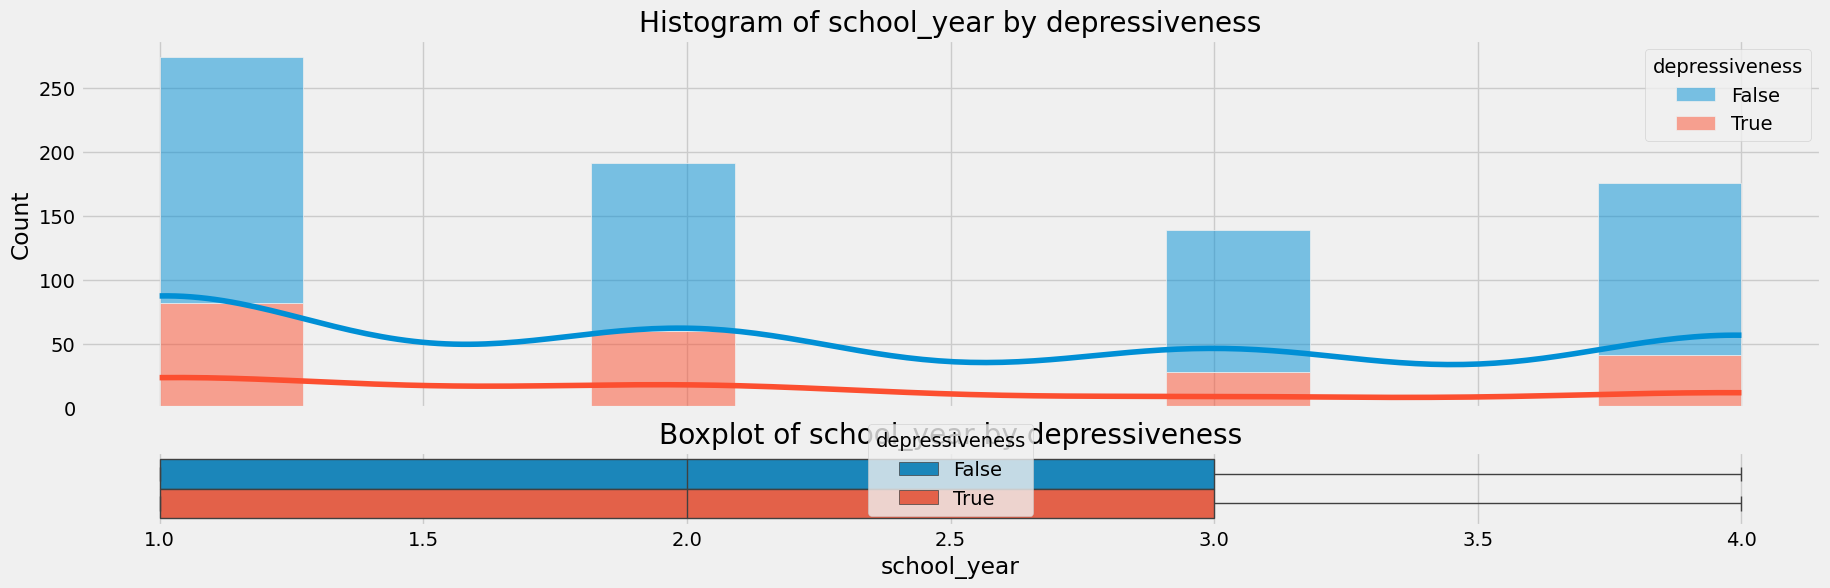

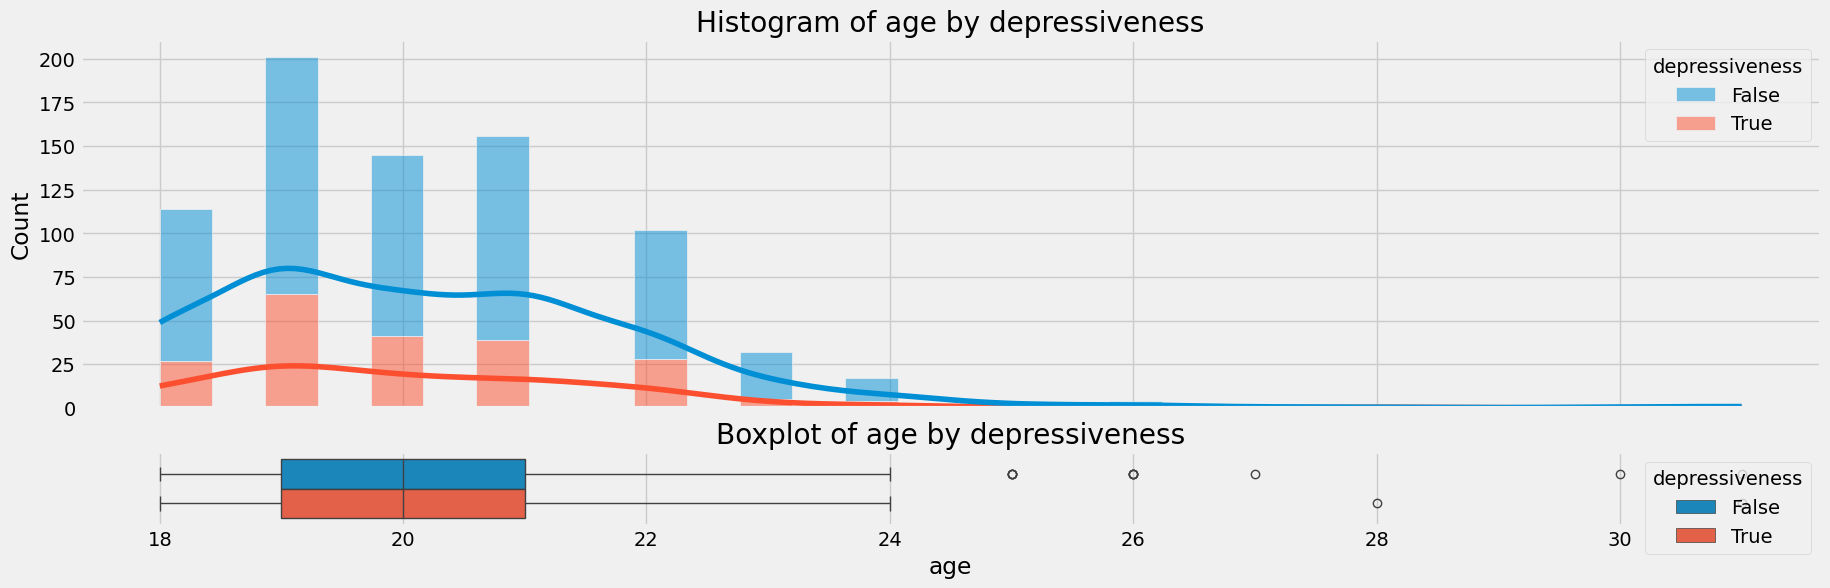

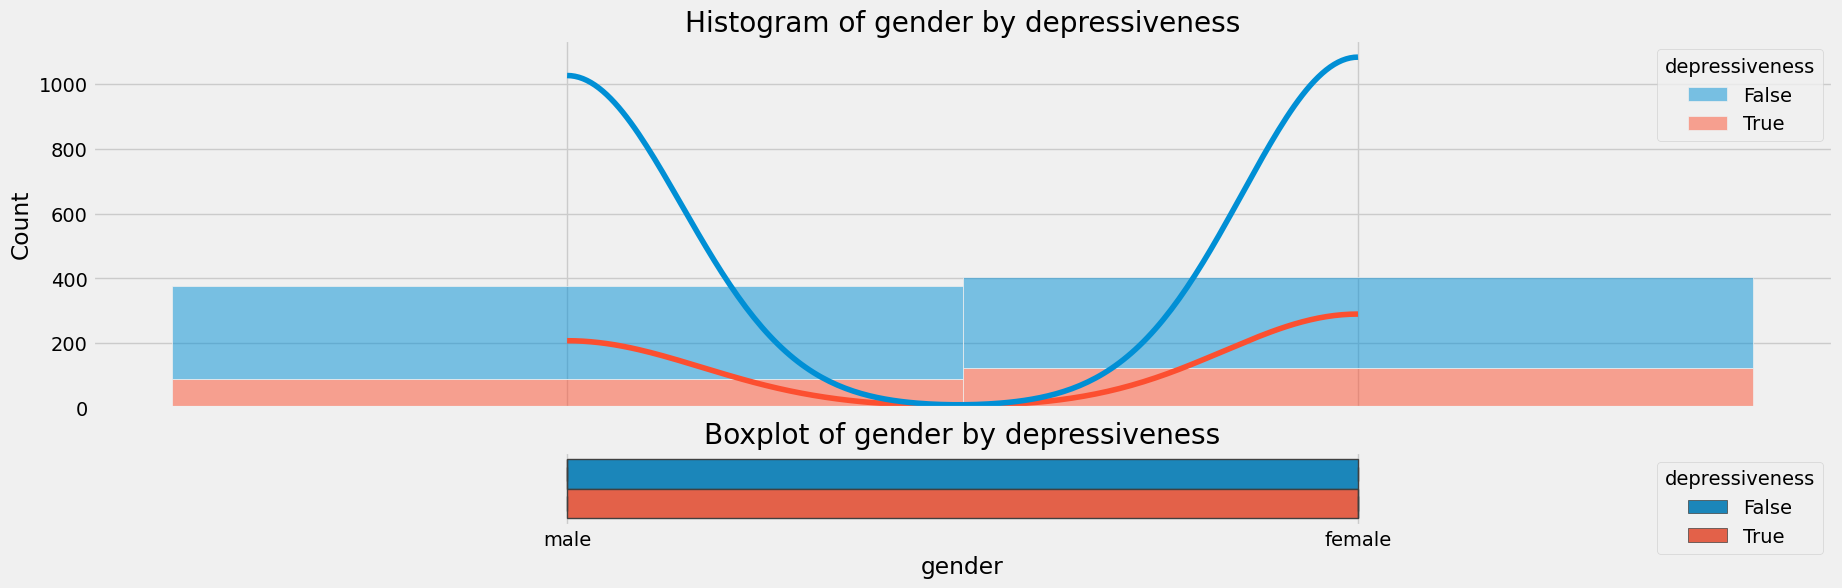

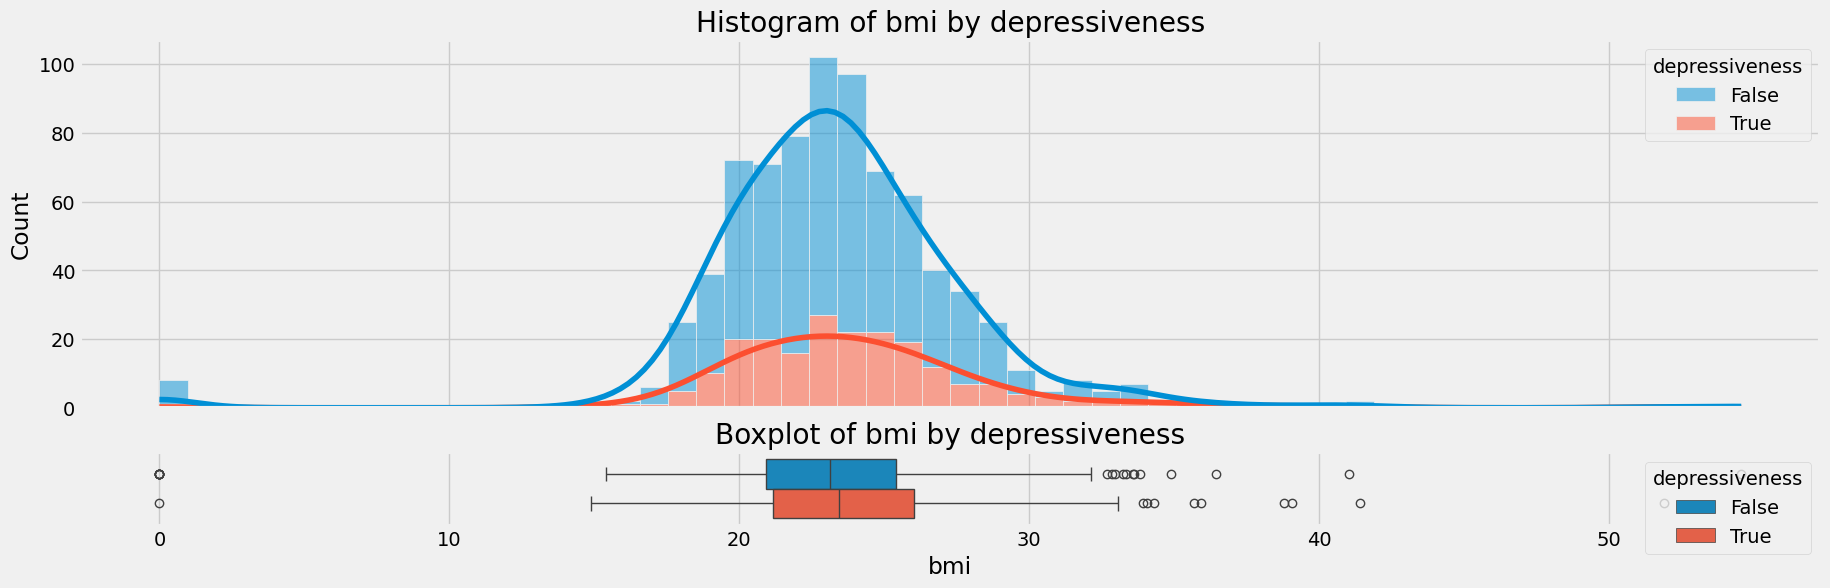

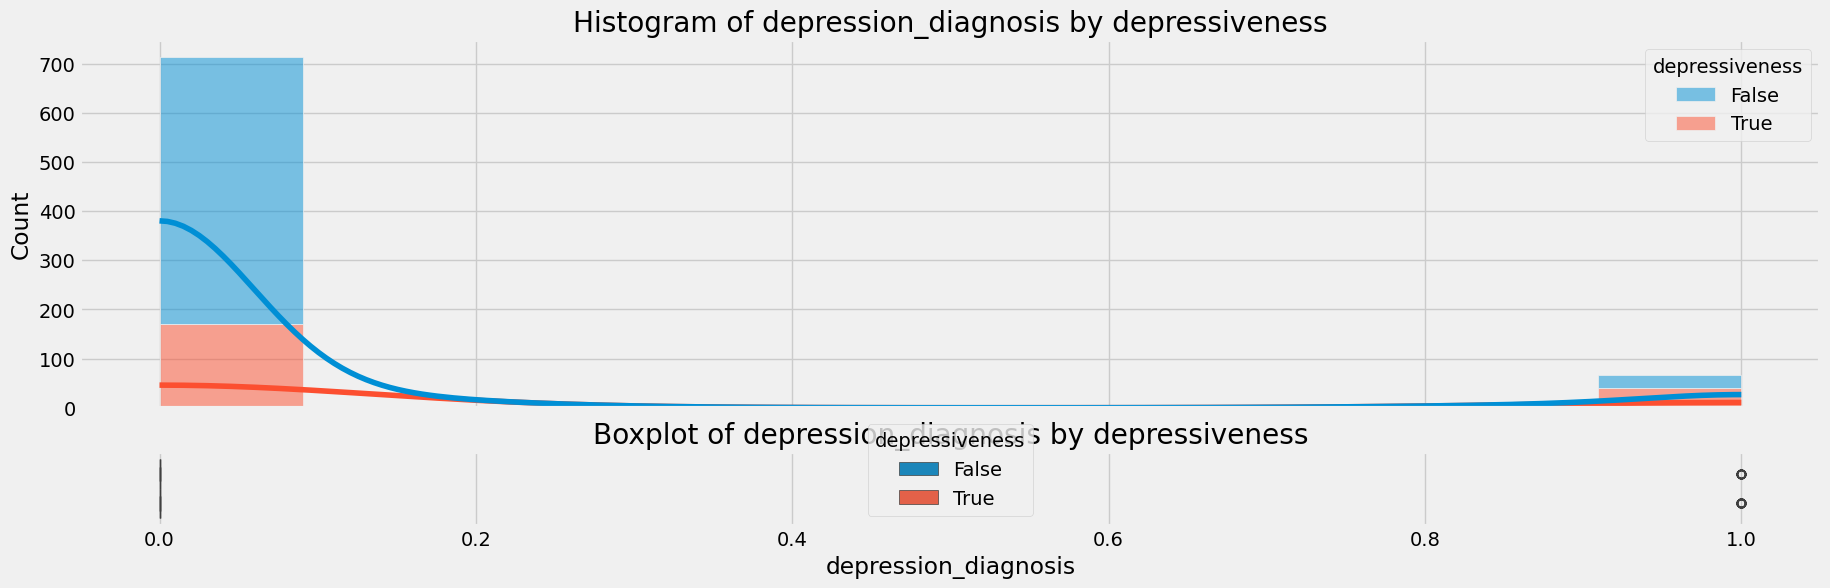

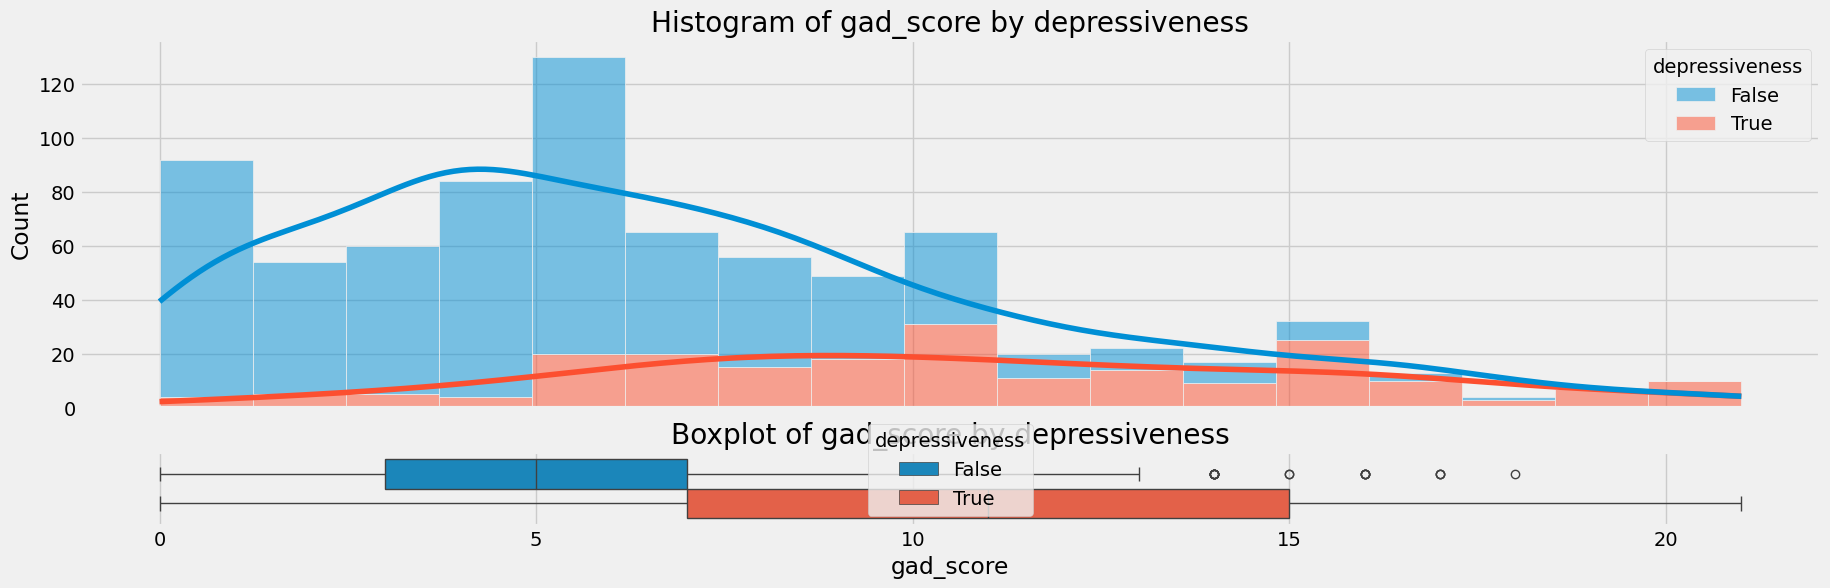

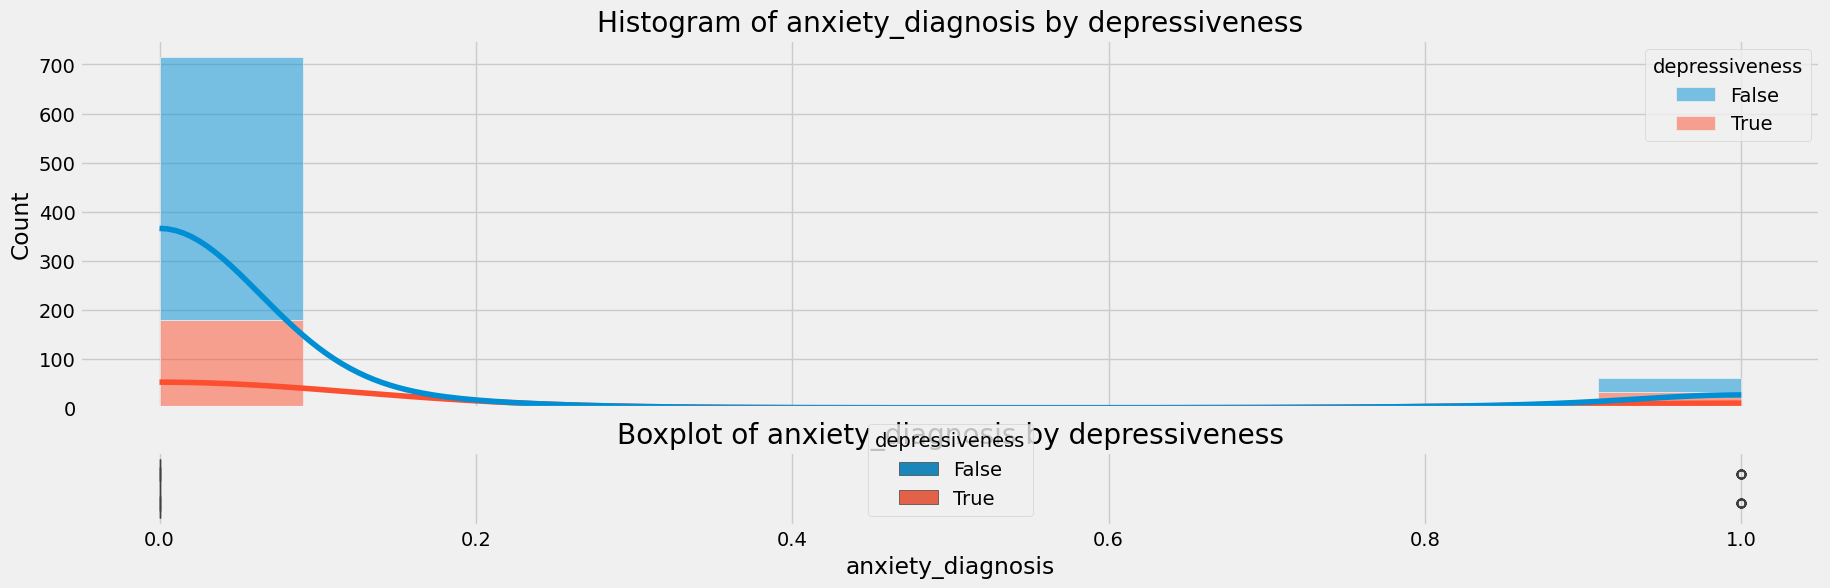

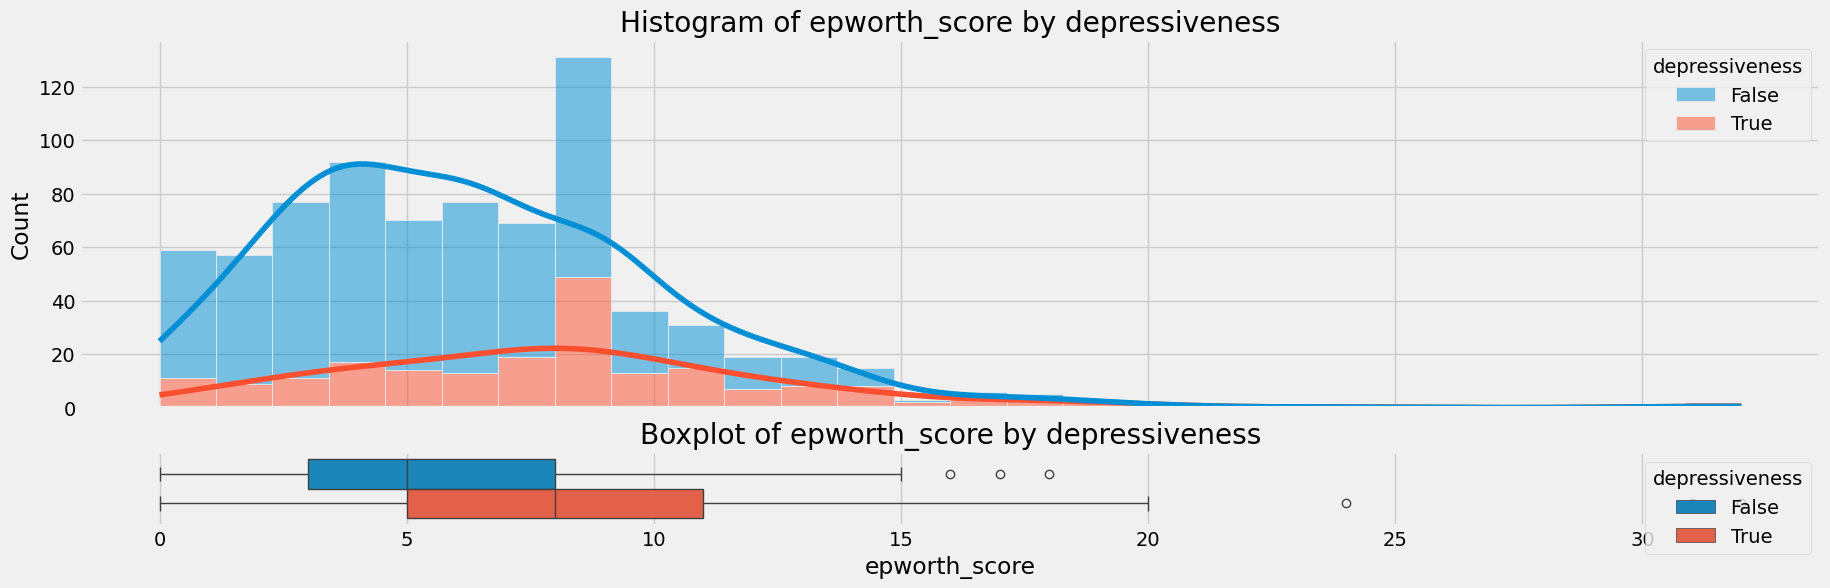

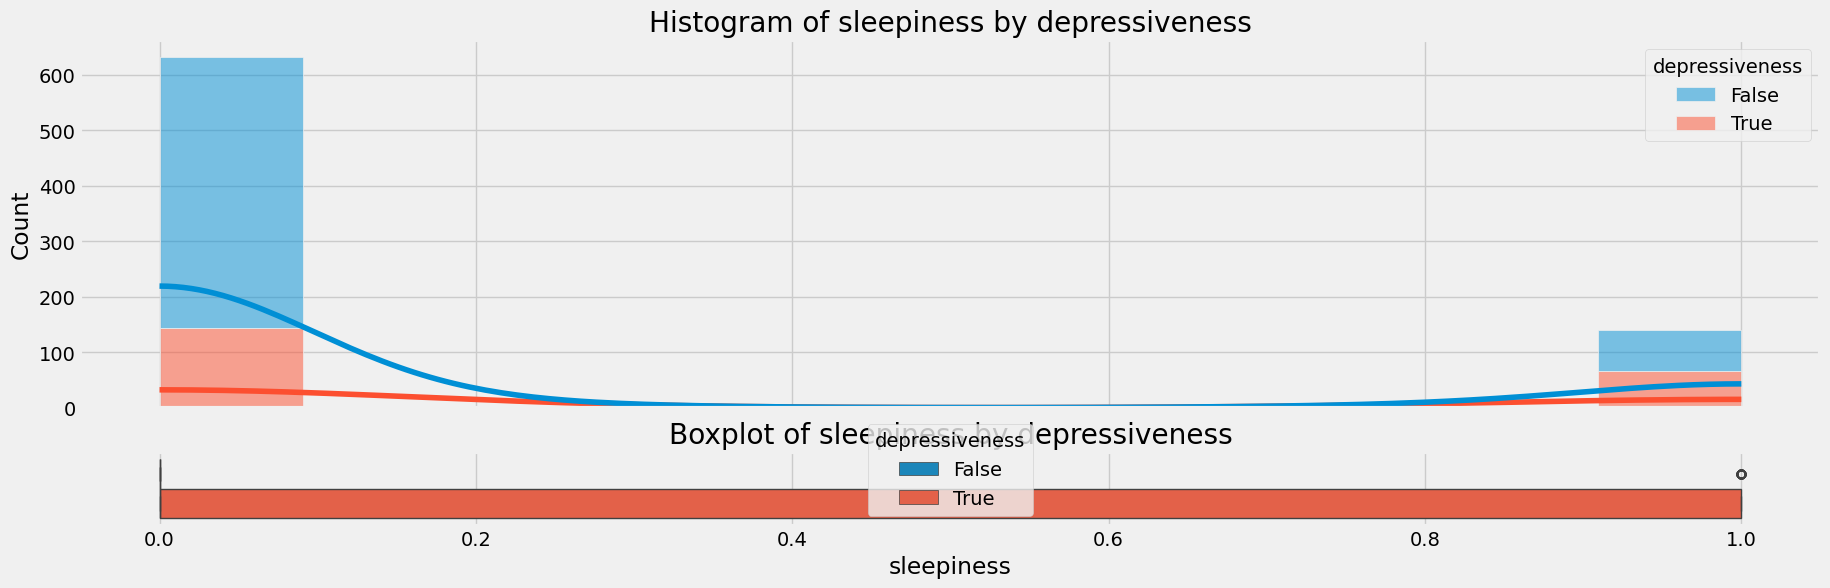

In [146]:

# Histogram and boxplot for the numerical features with the target "depressiveness" as Hue

for col in num_cols:

    # Full plot histogram and boxplot

    fig, axes = plt.subplots(2, 1, figsize=(20, 6), sharex=True, gridspec_kw={'height_ratios': [5, 1]})
    
    # Histogram
    sns.histplot(data=df_clean, x=col, hue='depressiveness', kde=True, multiple="stack", ax=axes[0])
    axes[0].set_title(f'Histogram of {col} by depressiveness')
    
    # Boxplot
    sns.boxplot(data=df_clean, x=col, hue='depressiveness', ax=axes[1])
    axes[1].set_title(f'Boxplot of {col} by depressiveness')



    # Titles of the axis
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('')
    plt.show()
    
        

In [82]:
display(df.head())

id  school_year  age  gender        bmi          who_bmi  phq_score  \
0   1            1   19       1  33.333333  Class I Obesity          9   
1   2            1   18       1  19.841270           Normal          8   
2   3            1   19       1  25.102391       Overweight          8   
3   4            1   18       0  23.738662           Normal         19   
4   5            1   18       1  25.617284       Overweight          6   

  depression_severity  depressiveness  suicidal  depression_diagnosis  \
0                Mild               0         0                     0   
1                Mild               0         0                     0   
2                Mild               0         0                     0   
3   Moderately severe               1         1                     0   
4                Mild               0         0                     0   

   depression_treatment  gad_score anxiety_severity  anxiousness  \
0                     0         11         Moderate            1   
1                     0          5             Mild            0   
2                     0          6             Mild            0   
3                     0         15           Severe            1   
4                     0         14         Moderate            1   

   anxiety_diagnosis  anxiety_treatment  epworth_score  sleepiness  \
0                  0                  0            7.0           0   
1                  0                  0           14.0           1   
2                  0                  0            6.0           0   
3                  0                  0           11.0           1   
4                  0                  0            3.0           0   

   treatment_status  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

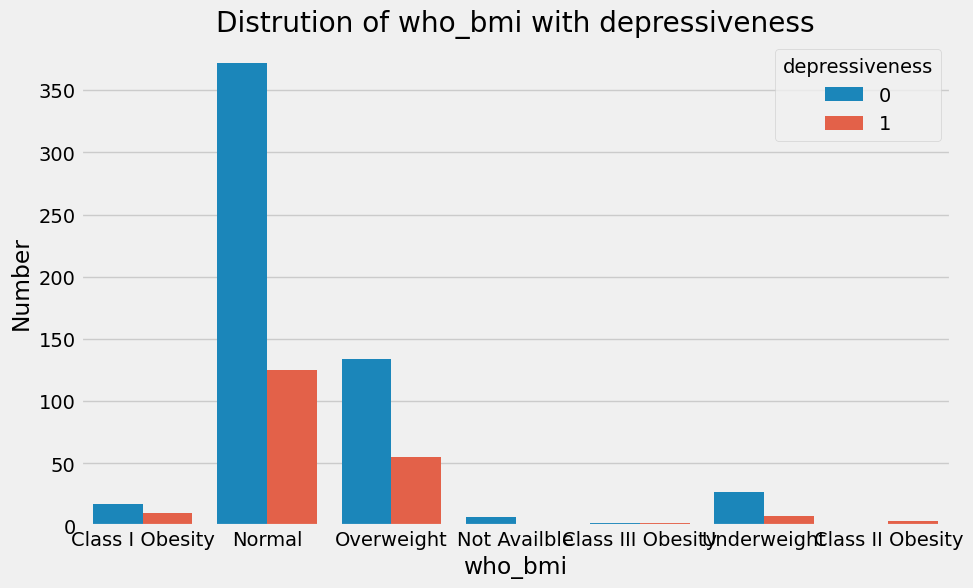

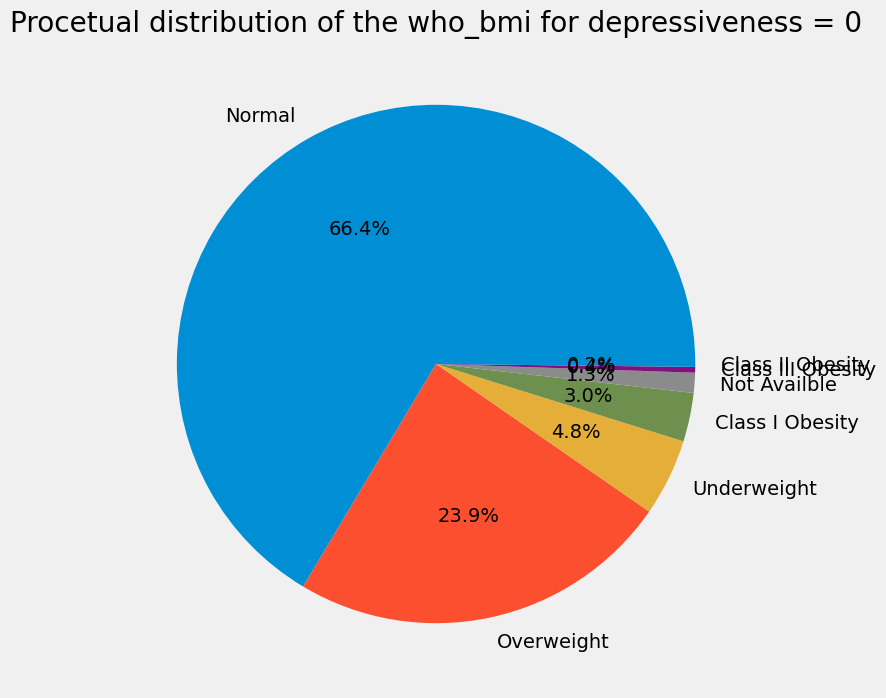

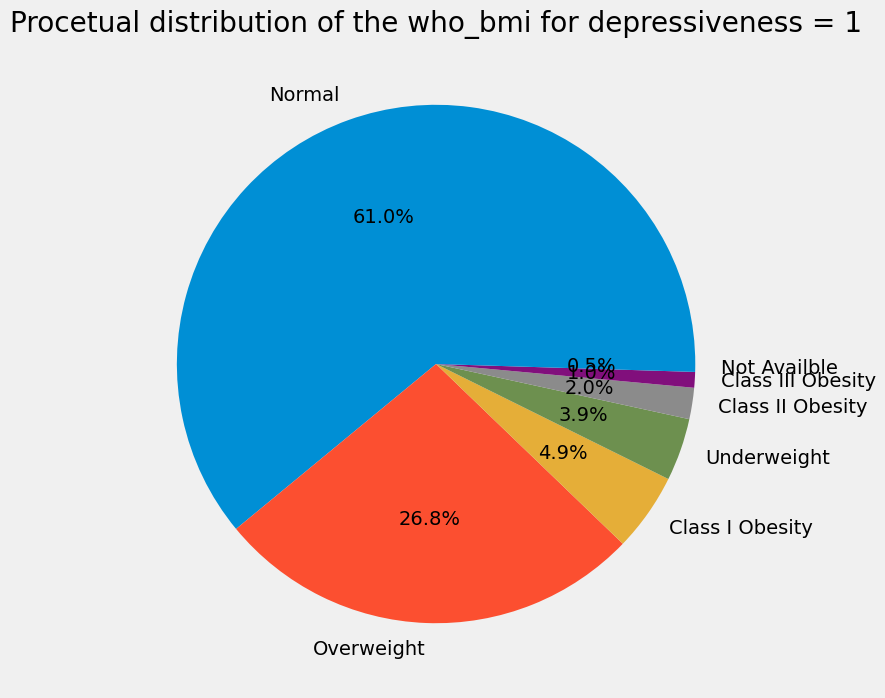

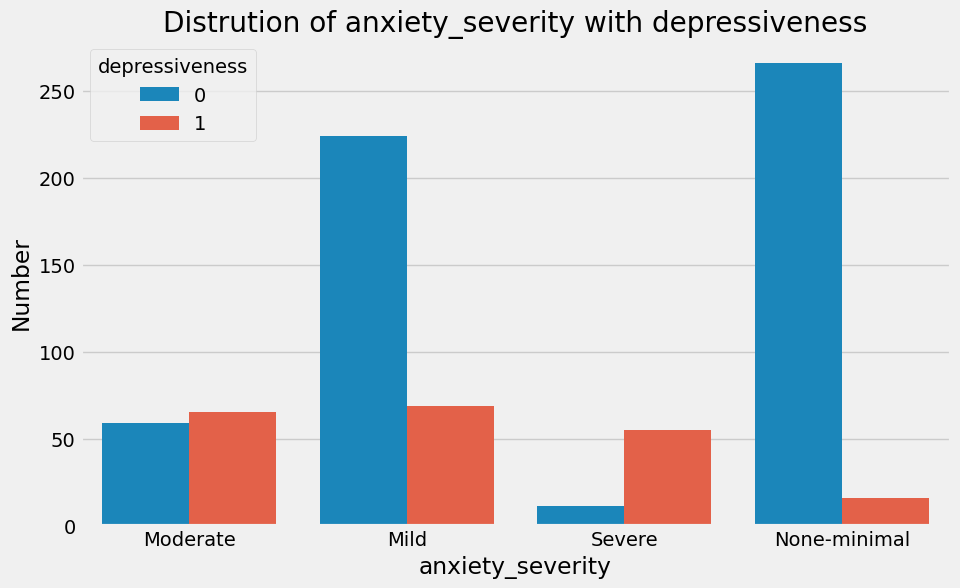

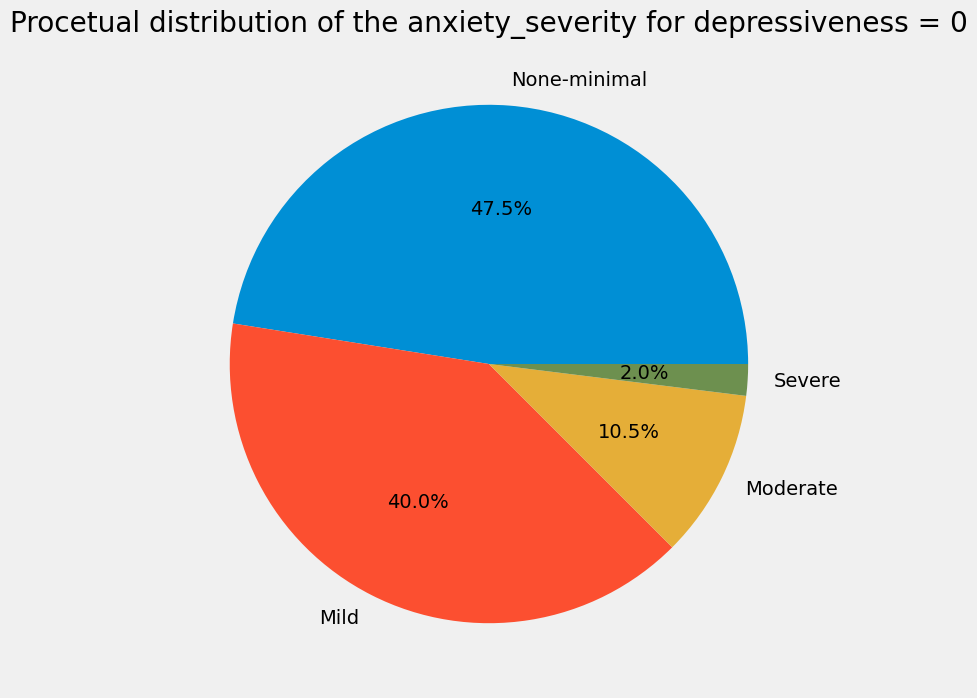

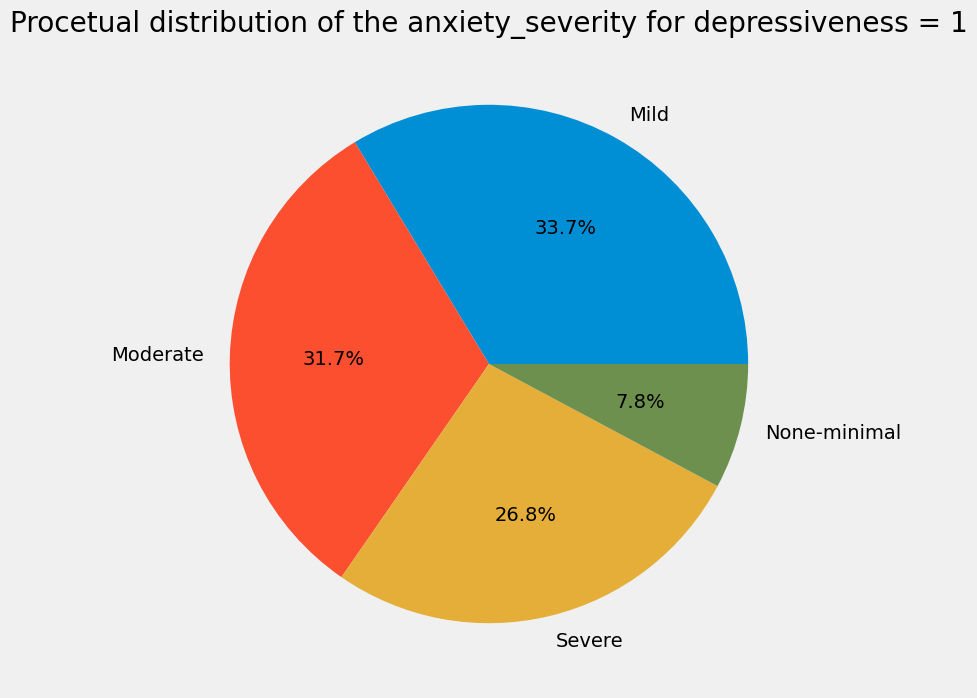

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_columns = ['who_bmi', 'anxiety_severity']
hue_column = 'depressiveness'

# Bar- and Pis-plot for all the categorical features, based on the hue "depressiveness"
for col in cat_columns:
    # Barplot 
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue=hue_column)
    plt.title(f'Distrution of {col} with {hue_column}')
    plt.xlabel(col)
    plt.ylabel('Number')
    plt.xticks(rotation=0)
    plt.show()

    # Pieplo

    hue_levels = df[hue_column].unique()
    for level in hue_levels:
        counts = df[df[hue_column] == level][col].value_counts()

        plt.figure(figsize=(8, 8))
        counts.plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Procetual distribution of the {col} for {hue_column} = {level}')
        plt.ylabel('')
        plt.show()


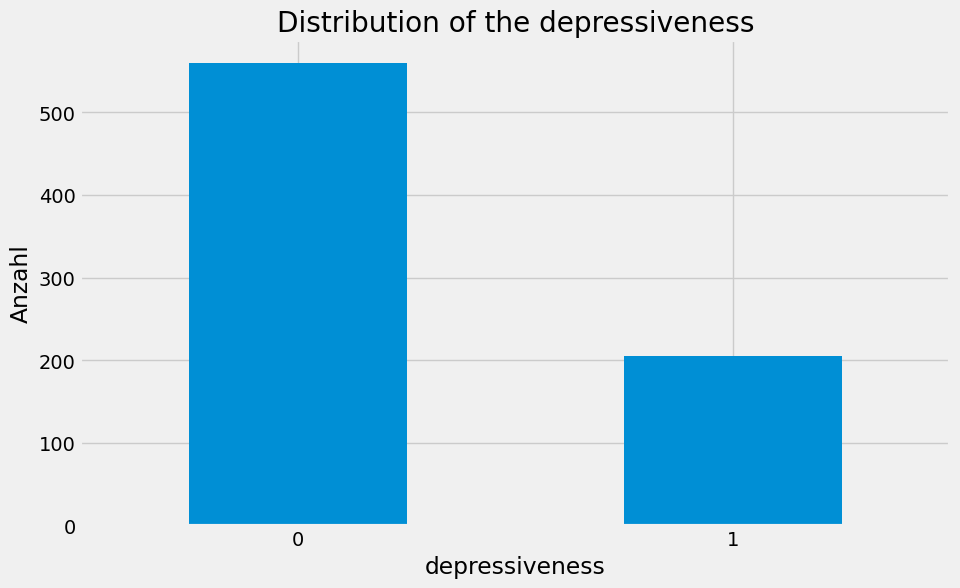

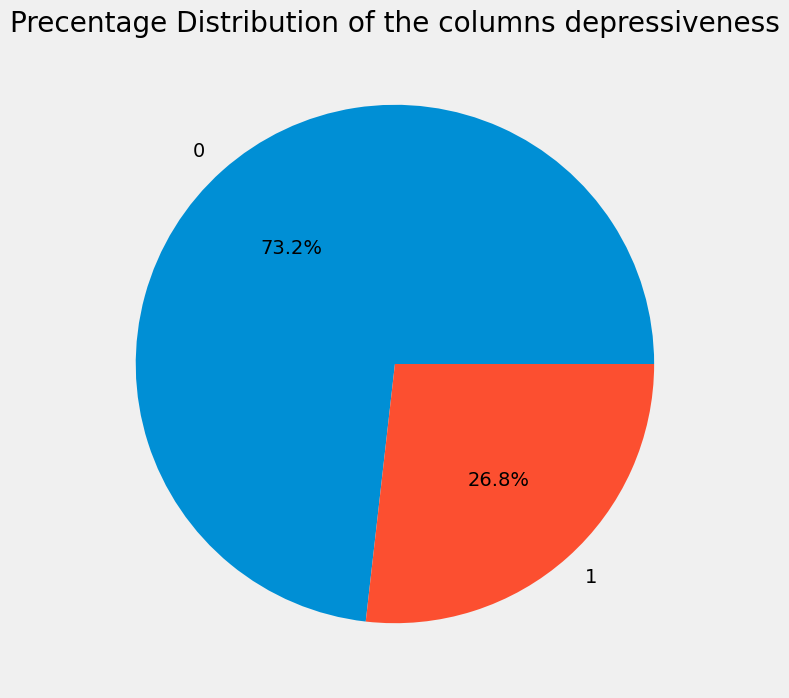

In [148]:
cat_aim = ['depressiveness']

# Bar- and Pie-Plots for the target
for col in cat_aim:
    # Daten für den Plot vorbereiten
    counts = df[col].value_counts()

    # Barplot
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar')
    plt.title(f'Distribution of the {col}')
    plt.xlabel(col)
    plt.ylabel('Anzahl')
    plt.xticks(rotation=0)
    plt.show()

    # Pieplot
    plt.figure(figsize=(8, 8))
    counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Precentage Distribution of the columns {col}')
    plt.ylabel('')
    plt.show()

In [150]:
# Important Columns and their relation, e.g., for the PCA

#num_cols = ['school_year', 'age', 'gender', 'bmi', 'phq_score', 'depression_diagnosis', 'gad_score',
#            'anxiety_diagnosis', 'epworth_score', 'sleepiness']

num_cols = ['school_year', 'age', 'gender', 'bmi', 'phq_score', 'gad_score',
            'anxiety_diagnosis', 'epworth_score', 'sleepiness']

num_cols_no_pca = ['gender', 'bmi']

num_cols_pca = ['school_year', 'age', 'depression_diagnosis', 'gad_score',
            'anxiety_diagnosis', 'epworth_score', 'sleepiness']

targets = ['anxiousness', 'depressiveness', 'treatment_status', 'suicidal']

# (depression_treatment and anxiety_treatment  are columns, which are used in the target treatment_status)

#cat_cols = ['who_bmi', 'depression_severity', 'anxiety_severity']
cat_cols = ['who_bmi', 'anxiety_severity']

target = ['depressiveness']

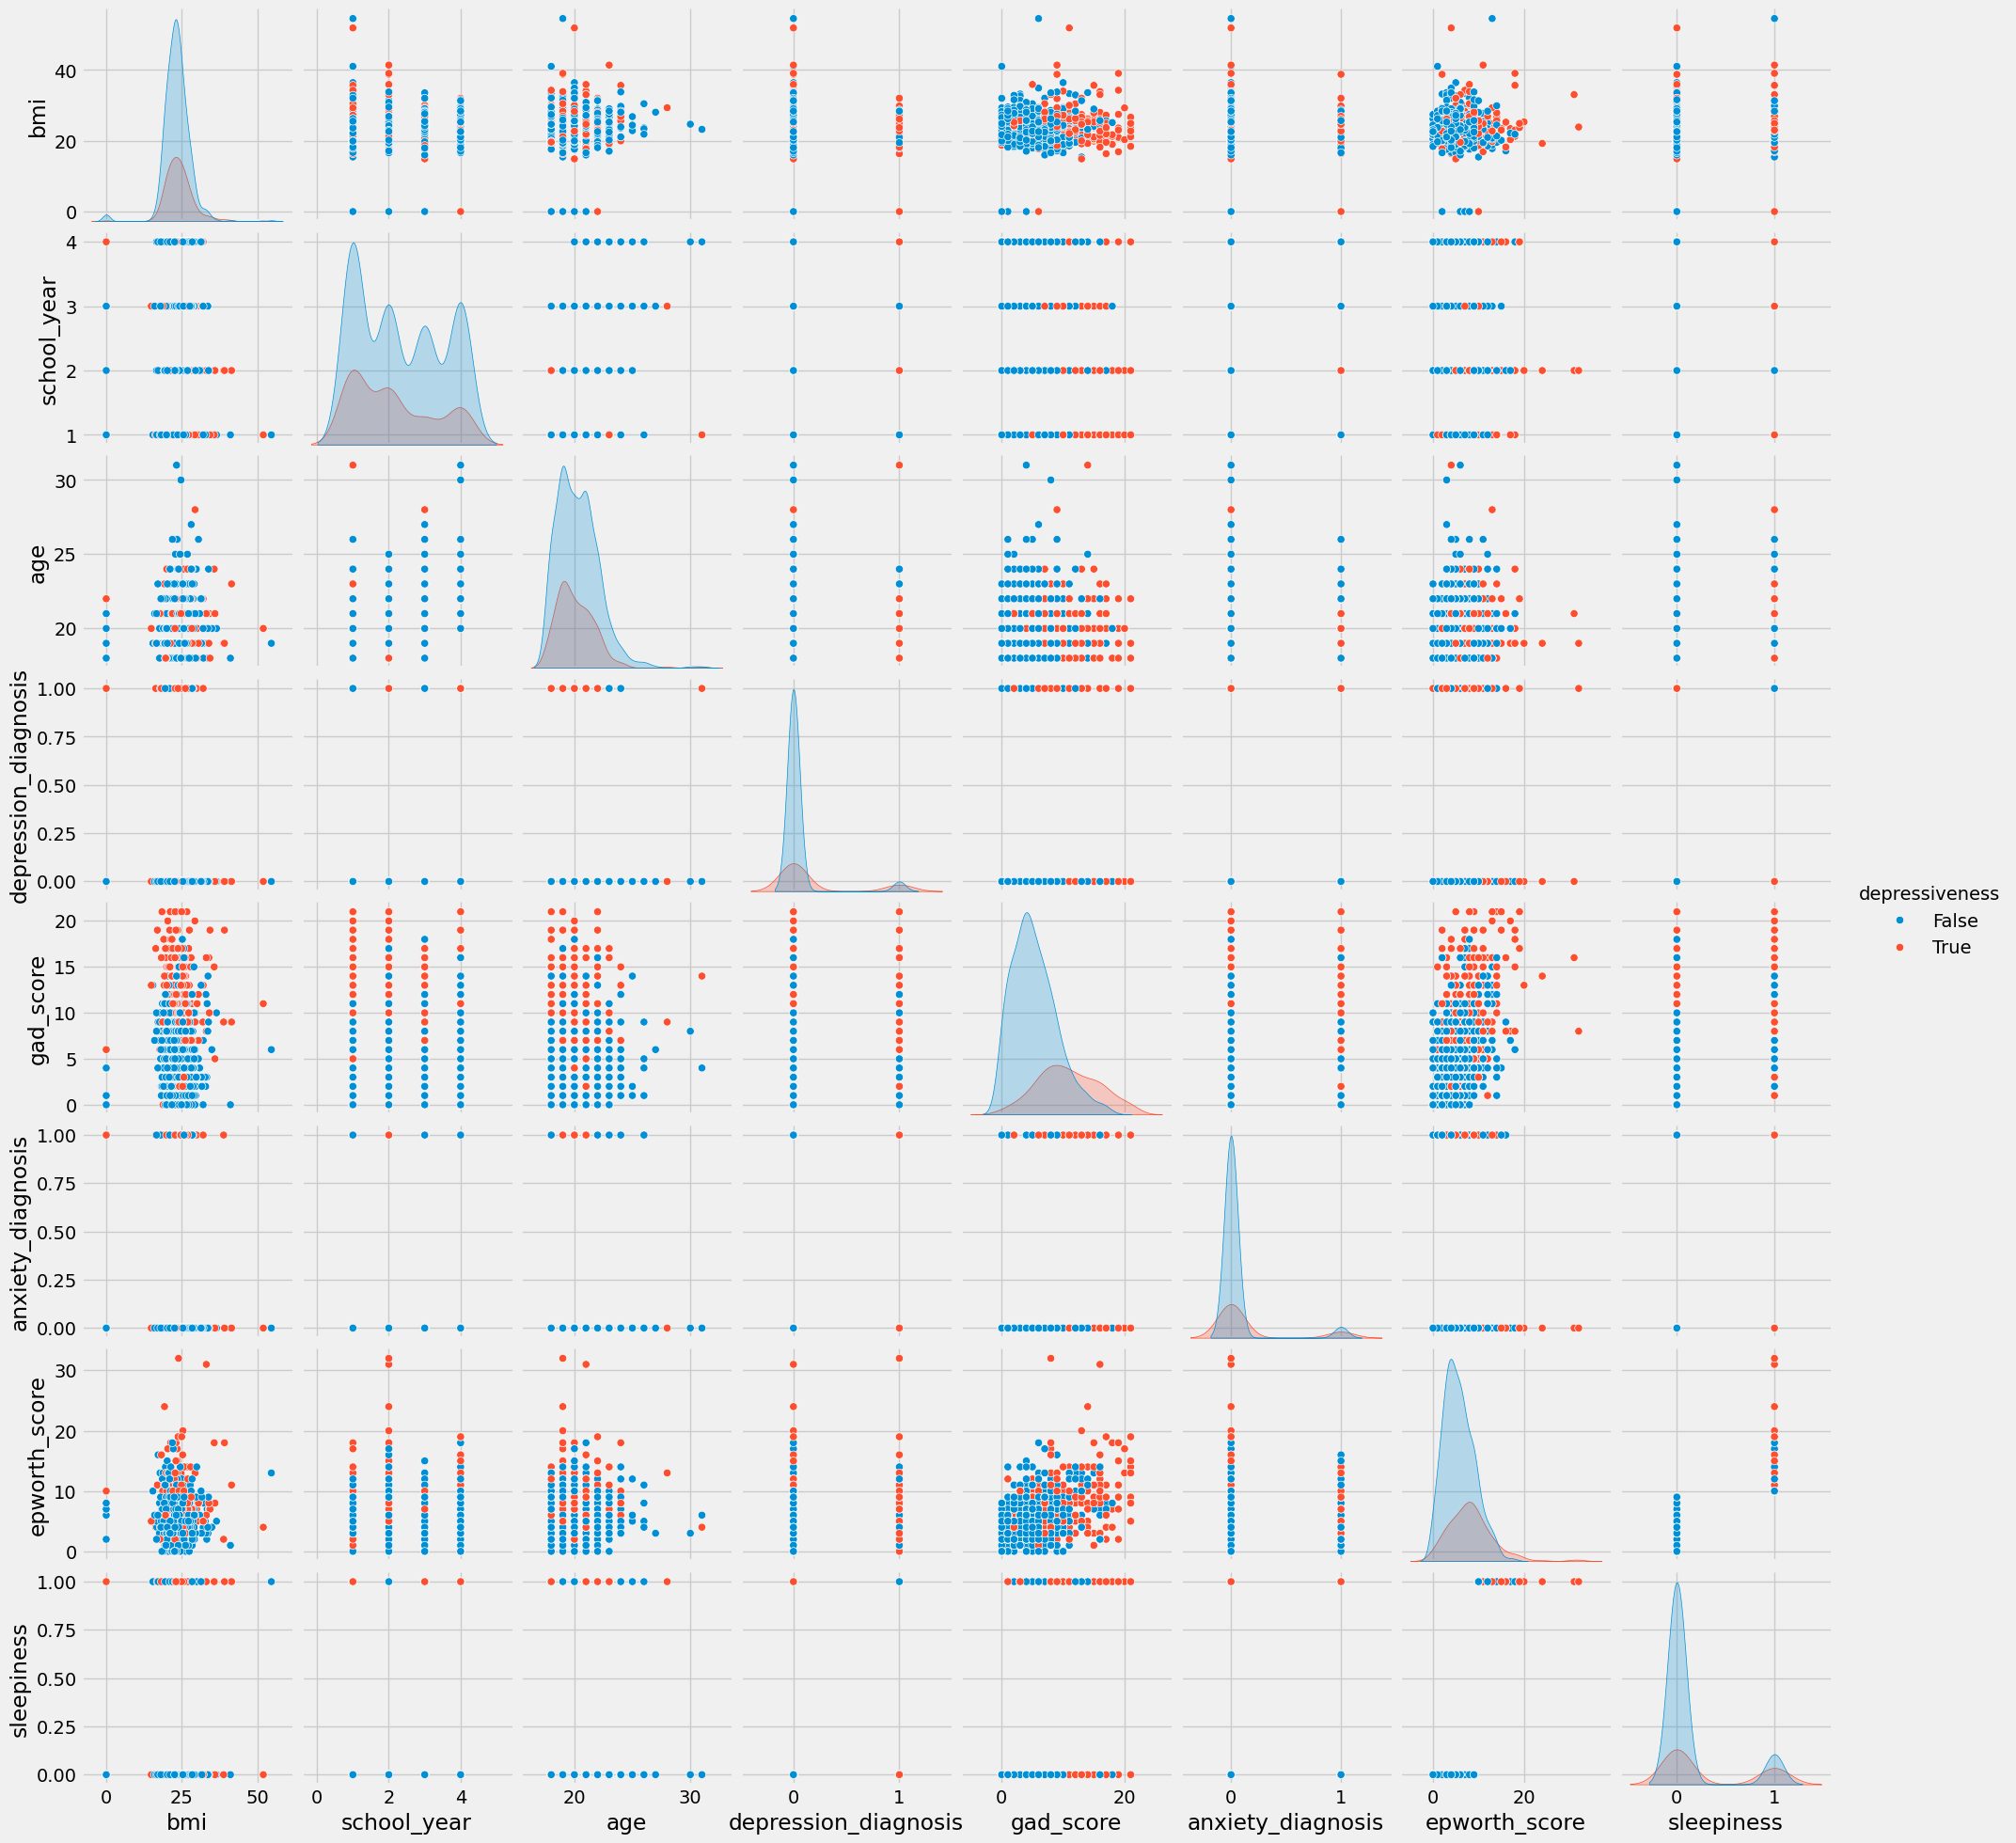

In [151]:
# Important numerical features:
#
num_cols_import = num_cols_no_pca + num_cols_pca

# Pairwise plot for the numerical columns Plot give with the target depressiveness
sns.pairplot(df_clean[num_cols_import + target], hue='depressiveness')
plt.show()


## Train-Test-Split

Splitt of the train and test-dates

**Always fit on Train Set only!** 

In [152]:
# read data (start from the dataset)
df = pd.read_csv("data/depression_anxiety_data.csv")


# perform train-test-split


# Feature-Matrix und Zielvektor definieren
features = df.drop(columns=['depressiveness'])
target = df['depressiveness']

# Daten aufteilen in Trainings- und Testdaten
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, test_size=0.1, random_state=42)


In [154]:
display(features_train)
display(target_train)

id  school_year  age  gender        bmi     who_bmi  phq_score  \
181  182            1   18    male  29.536862  Overweight          1   
54    55            1   18  female  21.773842      Normal          6   
734  735            4   22  female  22.718974      Normal          3   
365  366            2   20    male  23.566632      Normal          3   
97    98            1   18  female  25.636917  Overweight          6   
..   ...          ...  ...     ...        ...         ...        ...   
71    72            1   19    male  26.446281  Overweight          5   
106  107            1   19    male  26.555966  Overweight          5   
270  271            1   22    male  26.234568  Overweight          5   
435  436            2   21    male  26.234568  Overweight          8   
102  103            1   18  female  19.948060      Normal          7   

    depression_severity suicidal depression_diagnosis depression_treatment  \
181        None-minimal    False                False                False   
54                 Mild    False                False                False   
734        None-minimal    False                False                False   
365        None-minimal    False                False                False   
97                 Mild    False                False                False   
..                  ...      ...                  ...                  ...   
71                 Mild    False                False                False   
106                Mild    False                False                False   
270                Mild    False                False                False   
435                Mild    False                False                 True   
102                Mild    False                 True                False   

     gad_score anxiety_severity anxiousness anxiety_diagnosis  \
181          1     None-minimal       False             False   
54           5             Mild       False             False   
734          5             Mild       False             False   
365          8             Mild       False             False   
97           3     None-minimal       False             False   
..         ...              ...         ...               ...   
71           4     None-minimal       False             False   
106          4     None-minimal       False             False   
270          3     None-minimal       False             False   
435          6             Mild       False             False   
102          9             Mild       False             False   

    anxiety_treatment  epworth_score sleepiness  
181             False            3.0      False  
54              False           11.0       True  
734             False            5.0      False  
365             False            5.0      False  
97              False            1.0      False  
..                ...            ...        ...  
71              False            1.0      False  
106             False            2.0      False  
270             False            5.0      False  
435             False            0.0      False  
102             False            8.0      False  

[704 rows x 18 columns]

181    False
54     False
734    False
365    False
97     False
       ...  
71     False
106    False
270    False
435    False
102    False
Name: depressiveness, Length: 704, dtype: object

In [89]:
# save features_test as 'features_test.csv'

# Testdaten speichern
# features_test.to_csv('features_test.csv', index=False)


# I first clean the data-set, while we have in the target of the test also NaN, therefore I clean all and save ist after that!

## Data Preparation


We apply the *Data Preparation*, e.g., clean the dates and transprm the dates, e.g., special data-types

### Datatype Transformation

In [155]:
# Data Cleaning and Transformation Function
def clean_data(X, y=None):
    """Cleans and transforms the input feature DataFrame and optionally the target.

    This function performs the following operations on the feature DataFrame (X):
        - Drops rows with any missing values (NaNs) in either X or y to ensure they remain aligned.
        - Converts binary categorical features into numerical values (0 and 1).
        - Optionally, cleans and transforms the target DataFrame (y) if provided.
        - Converts datetime features to the appropriate datetime format.
        - Returns the cleaned features and optionally the cleaned target.

    Args: 
        X (pd.DataFrame): The feature data.
        y (pd.DataFrame, optional): The target data. Default is None.
        
    Returns:
        pd.DataFrame: A cleaned DataFrame with transformed features.
        pd.DataFrame: Optionally, the cleaned target DataFrame if y is provided.
    """
    # Concatenate X and y to handle missing values across both simultaneously
    if y is not None:
        # Combine X and y into a single DataFrame for joint NaN removal
        combined = pd.concat([X, y], axis=1)
        
        # Drop rows with any missing values in either X or y
        combined_clean = combined.dropna()
        
        # Separate X and y again
        X_clean = combined_clean.iloc[:, :X.shape[1]]
        y_clean = combined_clean.iloc[:, X.shape[1]:]
    else:
        # If y is not provided, only clean X
        X_clean = X.dropna()

    # List of categorical columns with binary values that need to be converted to integers
    cat_cols_trans = ['gender', 'depression_diagnosis', 'depression_treatment',  
                      'anxiety_diagnosis', 'sleepiness']

    # Map 'gender' column to integers: 'male' -> 1, 'female' -> 0
    X_clean['gender'] = X_clean['gender'].map({'male': 1, 'female': 0})

    # Convert the specified binary categorical columns in X to integers (0 and 1)
    X_clean[cat_cols_trans] = X_clean[cat_cols_trans].astype(int)

    if y is not None:
        # Convert all target variables to integers
        y_clean = y_clean.astype(int)
        # Return both cleaned X and cleaned y
        return X_clean, y_clean
    else:
        # If y is not provided, return only the cleaned features
        return X_clean


In [156]:
features_train, target_train = clean_data(features_train, target_train)

display(features_train.head())
display(target_train.head())

id  school_year  age  gender        bmi     who_bmi  phq_score  \
181  182            1   18       1  29.536862  Overweight          1   
54    55            1   18       0  21.773842      Normal          6   
734  735            4   22       0  22.718974      Normal          3   
365  366            2   20       1  23.566632      Normal          3   
97    98            1   18       0  25.636917  Overweight          6   

    depression_severity suicidal  depression_diagnosis  depression_treatment  \
181        None-minimal    False                     0                     0   
54                 Mild    False                     0                     0   
734        None-minimal    False                     0                     0   
365        None-minimal    False                     0                     0   
97                 Mild    False                     0                     0   

     gad_score anxiety_severity anxiousness  anxiety_diagnosis  \
181          1     None-minimal       False                  0   
54           5             Mild       False                  0   
734          5             Mild       False                  0   
365          8             Mild       False                  0   
97           3     None-minimal       False                  0   

    anxiety_treatment  epworth_score  sleepiness  
181             False            3.0           0  
54              False           11.0           1  
734             False            5.0           0  
365             False            5.0           0  
97              False            1.0           0

depressiveness
181               0
54                0
734               0
365               0
97                0

In [157]:
# Preparation of the test-data-set
features_test, target_test = clean_data(features_test, target_test)

display(features_test.head())
display(target_test.head())

# save features_test as 'features_test.csv'

# Testdaten speichern
features_test.to_csv('features_test.csv', index=False)

id  school_year  age  gender        bmi     who_bmi  phq_score  \
597  598            3   21       1  22.545959      Normal          4   
589  590            3   21       1  26.365603  Overweight          1   
208  209            1   21       1  24.897060      Normal         15   
291  292            2   19       0  23.529412      Normal         19   
174  175            1   20       1  24.814815      Normal         11   

    depression_severity suicidal  depression_diagnosis  depression_treatment  \
597        None-minimal    False                     0                     0   
589        None-minimal    False                     0                     0   
208   Moderately severe    False                     0                     1   
291   Moderately severe    False                     0                     0   
174            Moderate    False                     0                     0   

     gad_score anxiety_severity anxiousness  anxiety_diagnosis  \
597          0     None-minimal       False                  0   
589          1     None-minimal       False                  0   
208          5             Mild       False                  0   
291         21           Severe        True                  0   
174         10         Moderate        True                  0   

    anxiety_treatment  epworth_score  sleepiness  
597             False            8.0           0  
589             False            6.0           0  
208             False            1.0           0  
291             False           15.0           1  
174             False            8.0           0

depressiveness
597               0
589               0
208               1
291               1
174               1

### Data Imputation


#It is not necessary while we have a very simple data-set, where all the dates are given

In [158]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


print('Columns with NaN')
print('is NaN', features_train.isna().sum())

# Wir übernehmen den KNN Imputer:



# Possible imputer if necessary
""" num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('std_scaler', StandardScaler())
])

# Fit and Transform the training-data
features_train_transformed = num_transformer.fit_transform(features_train)

# fit and transorm the test-data
features_test_transformed = num_transformer.transform(features_test)

# Show the results
print("Transformed training-dates:\n", features_train_transformed)
print("Transformed testdates:\n", features_test_transformed) """



Columns with NaN
is NaN id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
suicidal                0
depression_diagnosis    0
depression_treatment    0
gad_score               0
anxiety_severity        0
anxiousness             0
anxiety_diagnosis       0
anxiety_treatment       0
epworth_score           0
sleepiness              0
dtype: int64


' num_transformer = Pipeline(steps=[\n    (\'imputer\', KNNImputer(n_neighbors=5)),\n    (\'std_scaler\', StandardScaler())\n])\n\n# Fit and Transform the training-data\nfeatures_train_transformed = num_transformer.fit_transform(features_train)\n\n# fit and transorm the test-data\nfeatures_test_transformed = num_transformer.transform(features_test)\n\n# Show the results\nprint("Transformed training-dates:\n", features_train_transformed)\nprint("Transformed testdates:\n", features_test_transformed) '

In [159]:
# Pipeline for the imputer

from sklearn.impute import SimpleImputer


num_cols = ['school_year', 'age', 'gender', 'bmi', 'phq_score', 'depression_diagnosis', 'gad_score',
            'anxiety_diagnosis', 'epworth_score', 'sleepiness']

num_cols_no_pca = ['gender', 'bmi']

num_cols_pca = ['school_year', 'age', 'phq_score', 'depression_diagnosis', 'gad_score',
            'anxiety_diagnosis', 'epworth_score', 'sleepiness']

targets = ['anxiousness', 'depressiveness', 'treatment_status', 'suicidal']

cat_cols = ['who_bmi', 'depression_severity', 'anxiety_severity']





cat_pipe = Pipeline(steps=[
    ("imp", SimpleImputer(strategy="constant", fill_value="missing")),
    ("ohe", OneHotEncoder(handle_unknown='ignore')),
])




#num_pipe = Pipeline(steps=[
#    ("imp", SimpleImputer(strategy="mean")),
#])

num_pipe = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('std_scaler', StandardScaler())
])




# Warnung vermeiden durch Kopieren des DataFrames, sher wichtig sonst funktioniert es nicht!
features_train = features_train.copy()
target_train = target_train.copy()


# Spalten-Transformator
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols)
    ])

# Erstellen einer kompletten Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fitte die Pipeline auf die Trainingsdaten
features_train_transformed = pipeline.fit_transform(features_train)

# Transformiere die Testdaten
features_test_transformed = pipeline.transform(features_test)

# Ergebnisse anzeigen
print("Transformierte Trainingsdaten:\n", features_train_transformed)
print("Transformierte Testdaten:\n", features_test_transformed)


# Überprüfen auf NaN-Werte
print('Anzahl der NaN-Werte in den transformierten Trainingsdaten:', np.isnan(features_train_transformed).sum())
print('Anzahl der NaN-Werte in den transformierten Testdaten:', np.isnan(features_test_transformed).sum())

Transformierte Trainingsdaten:
 [[-1.10408888 -1.25448001  1.04143754 ...  0.          1.
   0.        ]
 [-1.10408888 -1.25448001 -0.96021121 ...  0.          0.
   0.        ]
 [ 1.46673675  0.99966376 -0.96021121 ...  0.          0.
   0.        ]
 ...
 [-1.10408888  0.99966376  1.04143754 ...  0.          1.
   0.        ]
 [-0.24714701  0.43612782  1.04143754 ...  0.          0.
   0.        ]
 [-1.10408888 -1.25448001 -0.96021121 ...  0.          0.
   0.        ]]
Transformierte Testdaten:
 [[ 0.60979487  0.43612782  1.04143754 ...  0.          1.
   0.        ]
 [ 0.60979487  0.43612782  1.04143754 ...  0.          1.
   0.        ]
 [-1.10408888  0.43612782  1.04143754 ...  0.          0.
   0.        ]
 ...
 [ 0.60979487  0.43612782  1.04143754 ...  0.          0.
   0.        ]
 [-0.24714701 -1.25448001 -0.96021121 ...  0.          0.
   0.        ]
 [-0.24714701 -0.69094407  1.04143754 ...  1.          0.
   0.        ]]
Anzahl der NaN-Werte in den transformierten Trainings

### Deal with outliers

In [160]:
# Distribution of the datasets
print(target_train.value_counts())

# Optional: precentage distribution of the dataset
print(target_train.value_counts(normalize=True))

depressiveness
0                 506
1                 184
Name: count, dtype: int64
depressiveness
0                 0.733333
1                 0.266667
Name: proportion, dtype: float64


We apply the DBScan to detect the outliers. We saw, that we have only few outliers, which can be important and do not clean them.

In [161]:
from scipy.stats import pearsonr
from sklearn.cluster import DBSCAN


def identify_outliers_dbscan(X_train, correlation_threshold, num_cols, eps=0.5, min_samples=5, outlier_percentage=0.1):
    outlier_mask = pd.Series([False] * X_train.shape[0], index=X_train.index)
    columns = num_cols
    all_outlier_indices = []
    
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col_x = columns[i]
            col_y = columns[j]
            
            # Berechnen des Korrelationskoeffizienten
            correlation, _ = pearsonr(X_train[col_x], X_train[col_y])
            
            # Anwenden von DBSCAN nur bei hoher Korrelation
            if abs(correlation) >= correlation_threshold:
                X = X_train[[col_x, col_y]].values
                
                # DBSCAN anwenden
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                dbscan.fit(X)
                labels = dbscan.labels_
                
                # Ausreißer sind die Punkte mit dem Label -1
                outliers = labels == -1
                all_outlier_indices.extend(X_train.index[outliers])
    
    # Begrenzen der Anzahl der Ausreißer auf den gewünschten Prozentsatz
    all_outlier_indices = np.unique(all_outlier_indices)
    num_outliers = int(len(X_train) * outlier_percentage)
    
    if len(all_outlier_indices) > num_outliers:
        np.random.seed(0)  # Für Wiederholbarkeit
        selected_outliers = np.random.choice(all_outlier_indices, num_outliers, replace=False)
    else:
        selected_outliers = all_outlier_indices
    
    outlier_mask.loc[selected_outliers] = True
    
    return outlier_mask


# important Columns:

num_cols_import = ['school_year', 'age', 'gender', 'bmi', 'phq_score', 'depression_diagnosis', 'gad_score',
            'anxiety_diagnosis', 'epworth_score', 'sleepiness']
# Anwenden von identify_outliers_dbscan und Begrenzen auf 10% der Top Outliers
outlier_mask = identify_outliers_dbscan(features_train, correlation_threshold=0.7, 
                                        num_cols=num_cols_import, eps=0.7, min_samples=3, outlier_percentage=0.1)



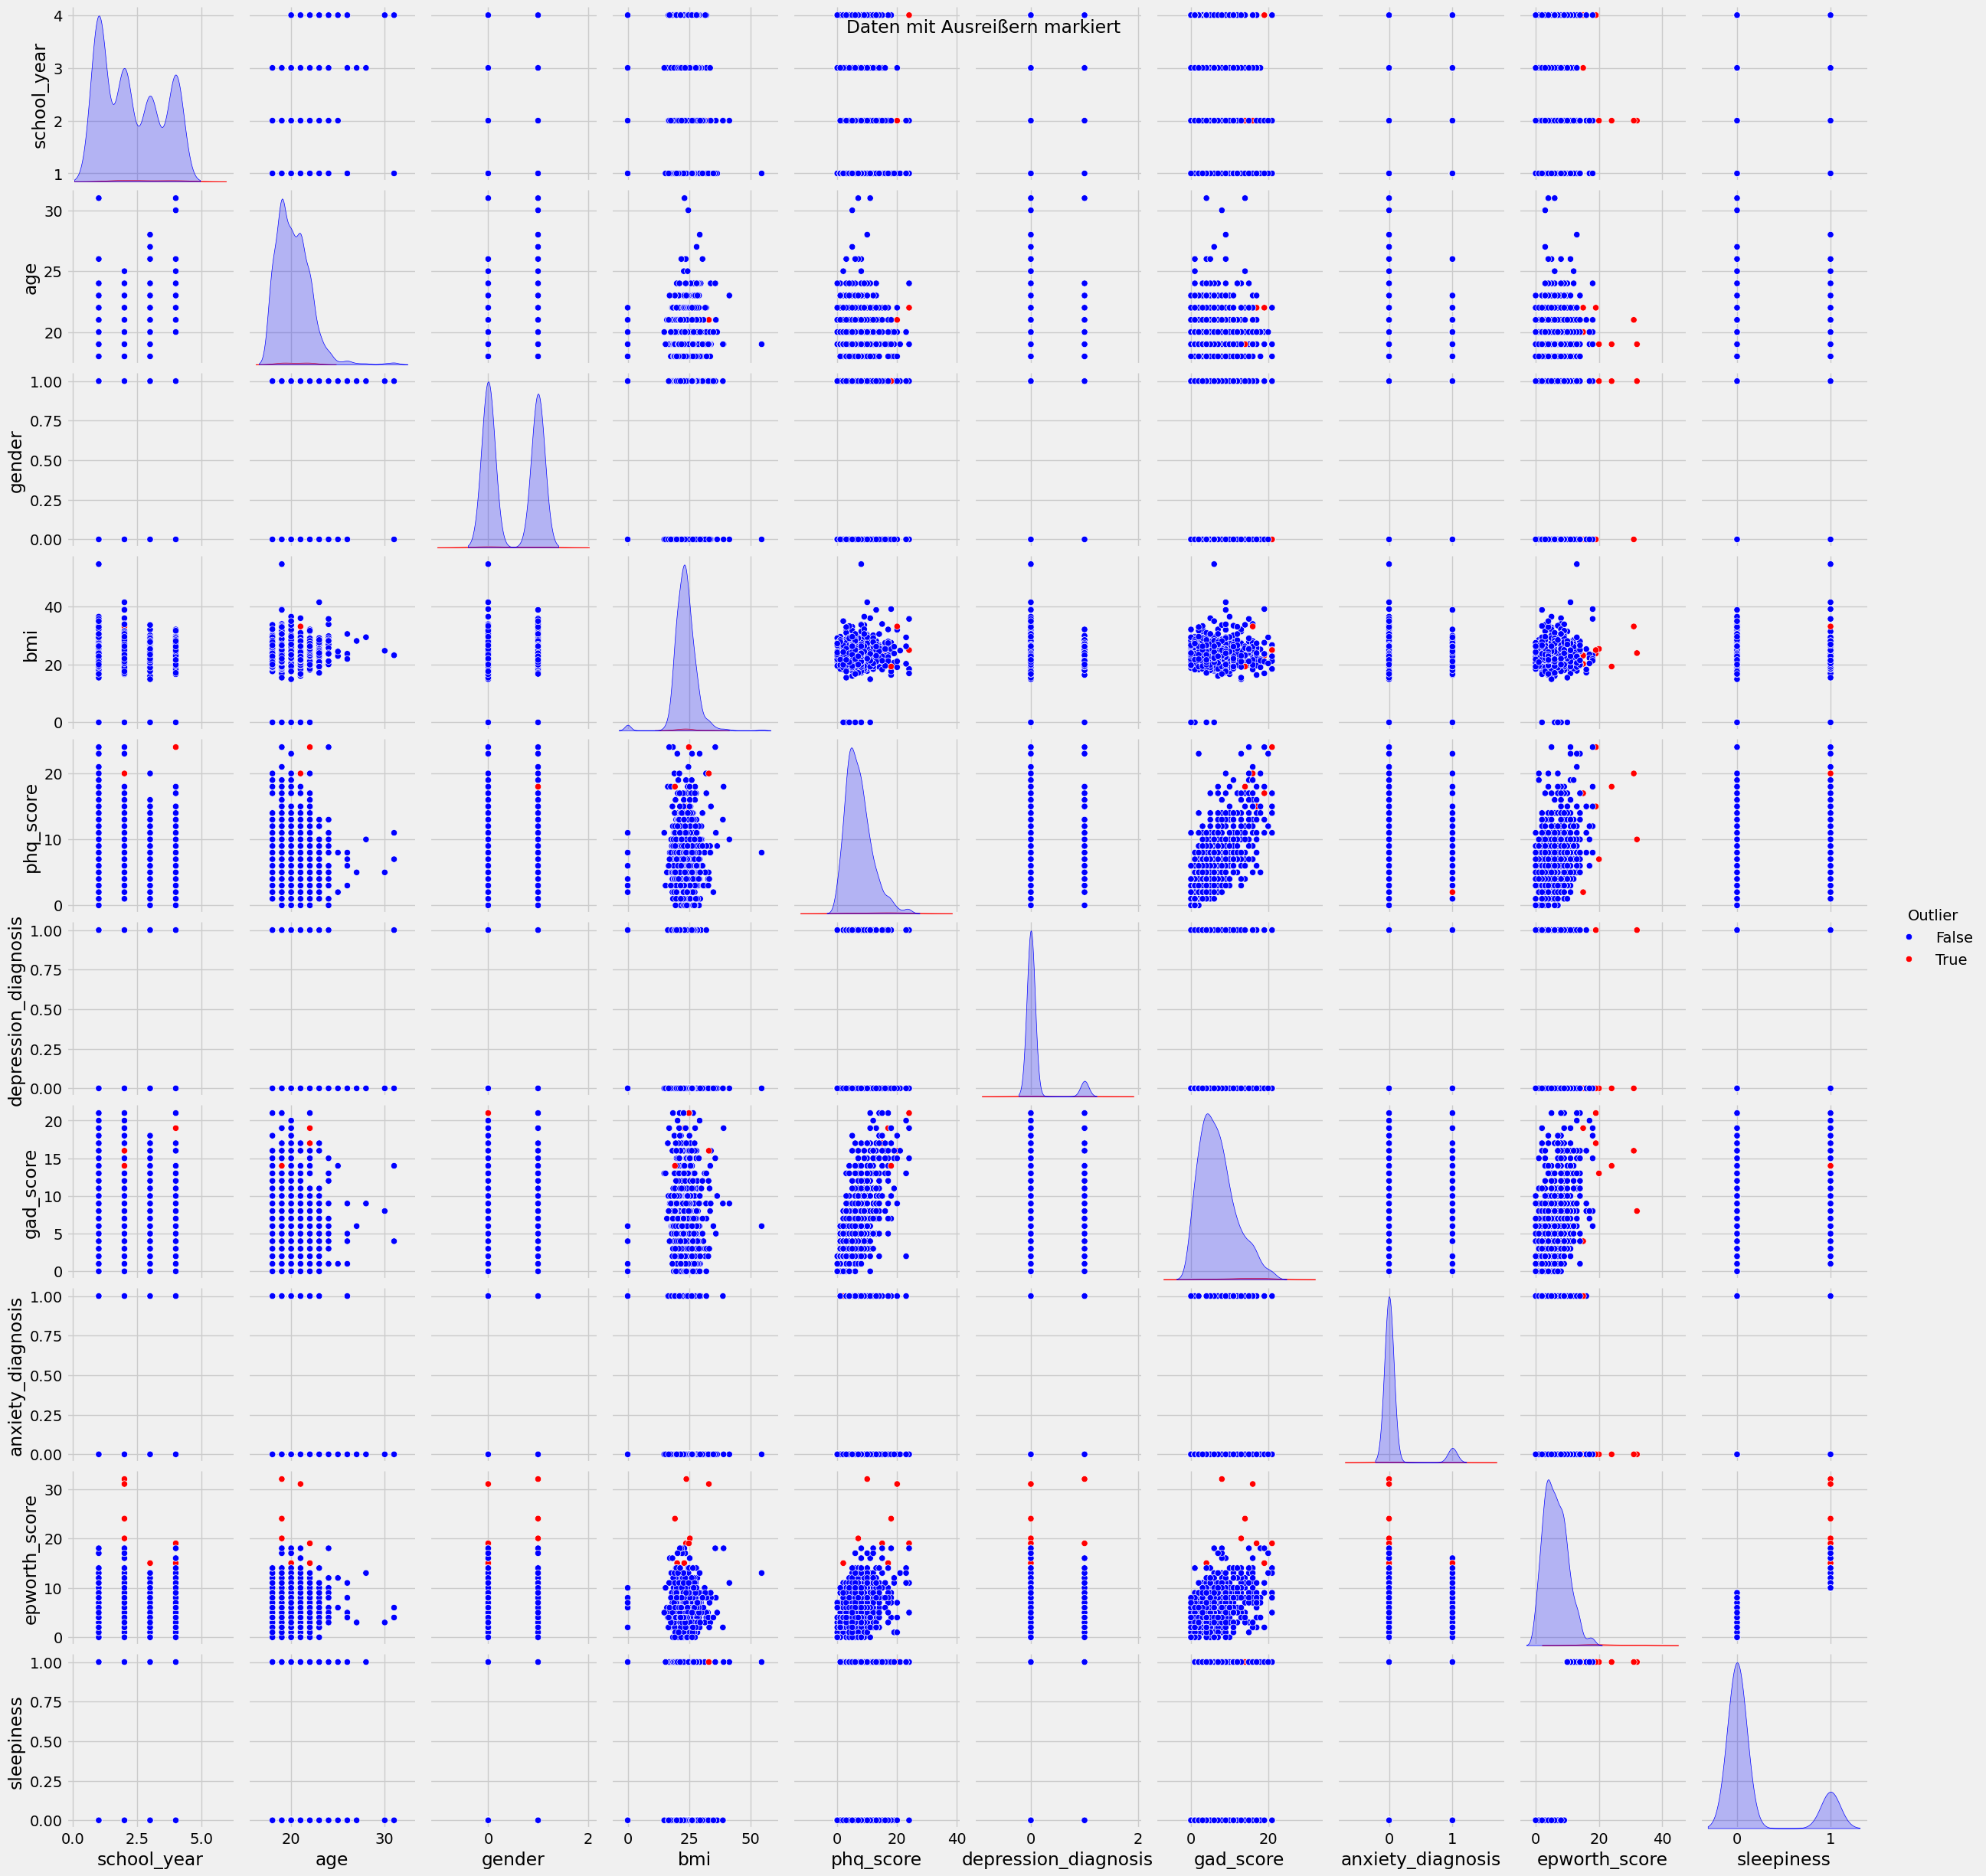

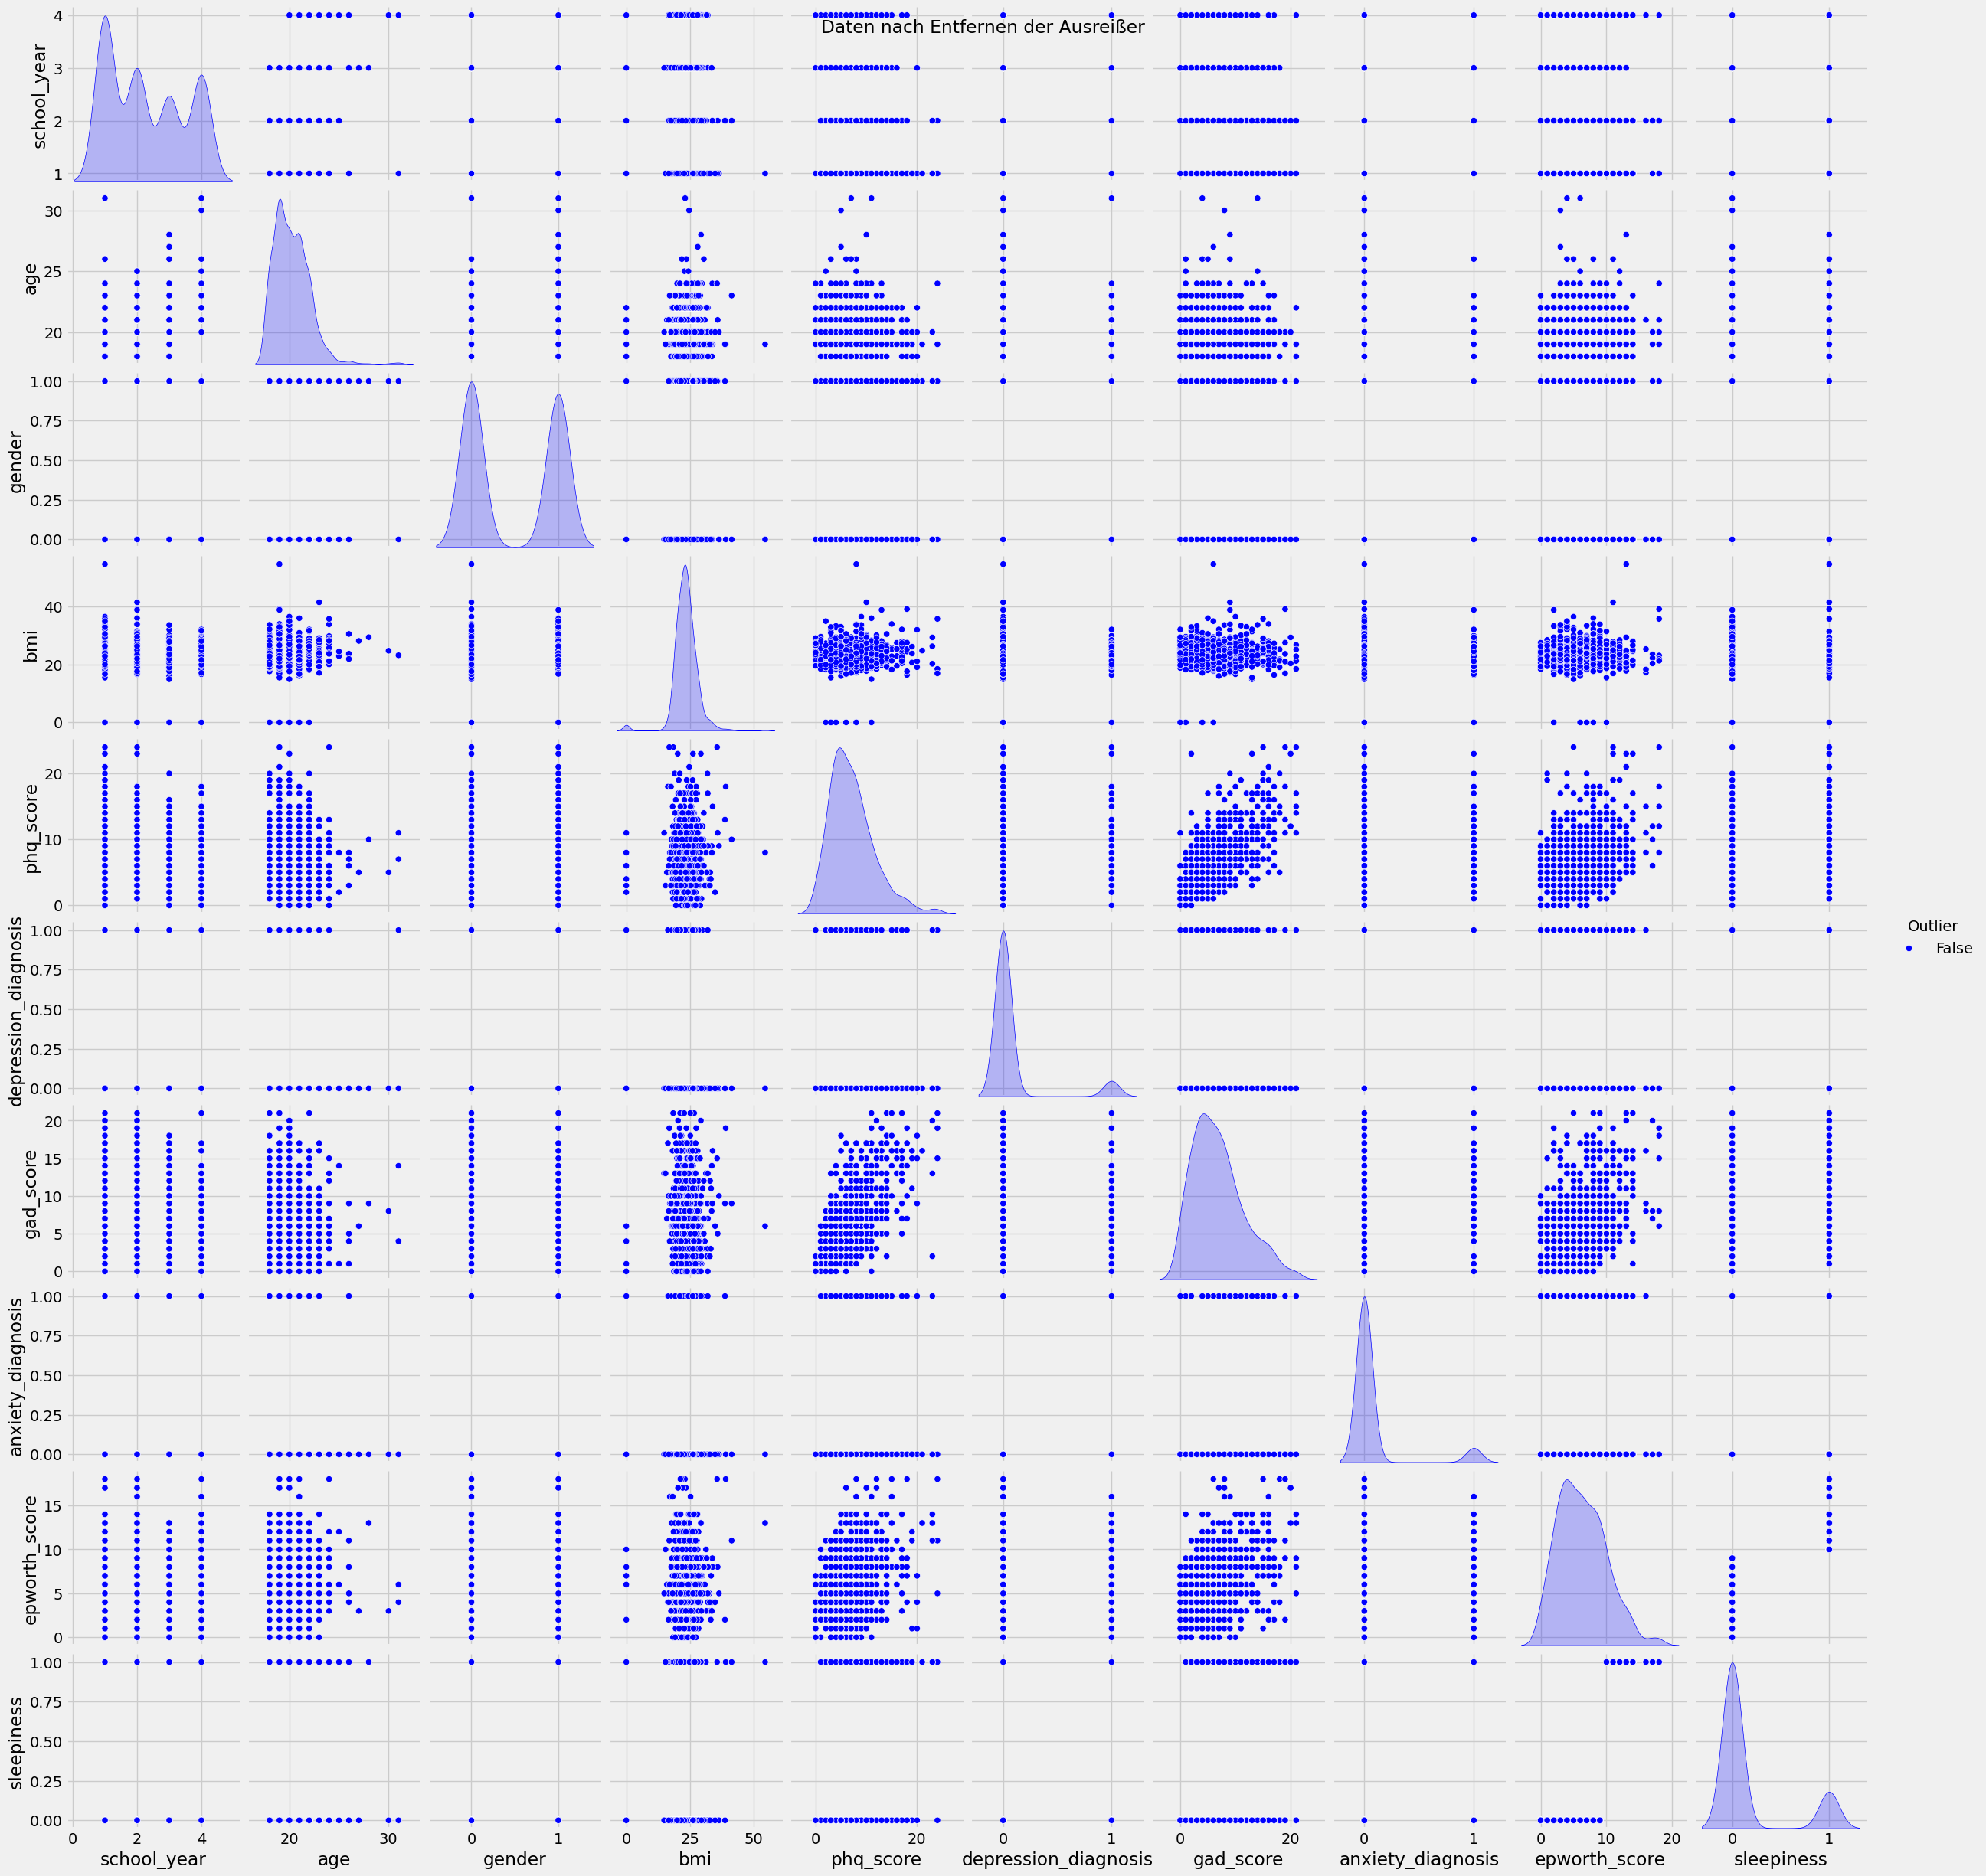

In [97]:
num_cols_print = num_cols_import





# Plot der Daten mit Ausreißern als Hue
def plot_data_with_outliers(X_train, outlier_mask, title):
    X_train_copy = X_train.copy()
    X_train_copy['Outlier'] = outlier_mask
    sns.pairplot(X_train_copy, hue='Outlier', vars=num_cols_print, diag_kind='kde', palette={True: "red", False: "blue"})
    plt.suptitle(title)
    plt.show()

plot_data_with_outliers(features_train, outlier_mask, "Daten mit Ausreißern markiert")

# Entfernen der Ausreißer
features_train_no_outliers = features_train[~outlier_mask]

# Um sicherzustellen, dass keine Spalten mit 0 Varianz vorhanden sind, können Sie diese vor dem Plotten überprüfen
def plot_data_no_outliers(X_train, num_cols_print, title):
    for col in num_cols:
        if X_train[col].nunique() <= 1:
            print(f"Skipping {col} as it has 0 variance")
            continue
        plt.figure(figsize=(10, 6))
        sns.histplot(data=X_train, x=col, hue='depressiveness', kde=True, multiple="stack")
        plt.title(f'Histogram of {col} by depressiveness')
        plt.show()

plot_data_with_outliers(features_train_no_outliers, outlier_mask[~outlier_mask], "Daten nach Entfernen der Ausreißer")

In [162]:
# Number of outliers
num_outliers = outlier_mask.sum()
print(f"Number of Outliers: {num_outliers}")


Number of Outliers: 8


### Resample

We apply an oversampler to balance the target colum.

*resampling* uses the `imblearn.pipeline`.

In [163]:
# We apply the resampling in the pipeline

from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier

# We apply an oversampler
#rf_pipe = ImbPipeline(steps=[
#    ("pre", preprocessing),
#    ("oversampler", RandomOverSampler()),   # Hinzufügen des RandomOverSamplers
#    ("kbest", SelectKBest(k=10, score_func=f_classif)),
#    ("model", RandomForestClassifier()),
#])


In [164]:
# We see the unbalance of the target and apply it to the pipeline
print(target_train.value_counts())

# Percantage of the imbalance
print(target_train.value_counts(normalize=True))





depressiveness
0                 506
1                 184
Name: count, dtype: int64
depressiveness
0                 0.733333
1                 0.266667
Name: proportion, dtype: float64


In [165]:
display(features_train)

display(features_train.dtypes)


display(target_train)

display(target_train.dtypes)

id  school_year  age  gender        bmi     who_bmi  phq_score  \
181  182            1   18       1  29.536862  Overweight          1   
54    55            1   18       0  21.773842      Normal          6   
734  735            4   22       0  22.718974      Normal          3   
365  366            2   20       1  23.566632      Normal          3   
97    98            1   18       0  25.636917  Overweight          6   
..   ...          ...  ...     ...        ...         ...        ...   
71    72            1   19       1  26.446281  Overweight          5   
106  107            1   19       1  26.555966  Overweight          5   
270  271            1   22       1  26.234568  Overweight          5   
435  436            2   21       1  26.234568  Overweight          8   
102  103            1   18       0  19.948060      Normal          7   

    depression_severity suicidal  depression_diagnosis  depression_treatment  \
181        None-minimal    False                     0                     0   
54                 Mild    False                     0                     0   
734        None-minimal    False                     0                     0   
365        None-minimal    False                     0                     0   
97                 Mild    False                     0                     0   
..                  ...      ...                   ...                   ...   
71                 Mild    False                     0                     0   
106                Mild    False                     0                     0   
270                Mild    False                     0                     0   
435                Mild    False                     0                     1   
102                Mild    False                     1                     0   

     gad_score anxiety_severity anxiousness  anxiety_diagnosis  \
181          1     None-minimal       False                  0   
54           5             Mild       False                  0   
734          5             Mild       False                  0   
365          8             Mild       False                  0   
97           3     None-minimal       False                  0   
..         ...              ...         ...                ...   
71           4     None-minimal       False                  0   
106          4     None-minimal       False                  0   
270          3     None-minimal       False                  0   
435          6             Mild       False                  0   
102          9             Mild       False                  0   

    anxiety_treatment  epworth_score  sleepiness  
181             False            3.0           0  
54              False           11.0           1  
734             False            5.0           0  
365             False            5.0           0  
97              False            1.0           0  
..                ...            ...         ...  
71              False            1.0           0  
106             False            2.0           0  
270             False            5.0           0  
435             False            0.0           0  
102             False            8.0           0  

[690 rows x 18 columns]

id                        int64
school_year               int64
age                       int64
gender                    int32
bmi                     float64
who_bmi                  object
phq_score                 int64
depression_severity      object
suicidal                 object
depression_diagnosis      int32
depression_treatment      int32
gad_score                 int64
anxiety_severity         object
anxiousness              object
anxiety_diagnosis         int32
anxiety_treatment        object
epworth_score           float64
sleepiness                int32
dtype: object

depressiveness
181               0
54                0
734               0
365               0
97                0
..              ...
71                0
106               0
270               0
435               0
102               0

[690 rows x 1 columns]

depressiveness    int32
dtype: object

## Modeling

Kommen wir nun zur Kernaufgabe eines *Data Scientist*, dem Bauen von Maschine-Learning-Modellen. Wie du es im Training bereits gelernt hast, ist das Optimieren eines Modells ein iterativer Prozess. Die nachfolgenden Schritte wirst du also sicher mehr als einmal durchführen.

### Build a simple Baselinemodel

We built a baseline model:

1. Numerical features (`num_cols`) and categorical features (`cat_cols`),
3. We apply a baseline model,
3. We apply a pipeline (`model_baseline`),
4. We apply the `features_train` and the `target _train` for the  *fitting* ,
5. We apply the `model_baseline` to predict the `features_test`.

In [166]:
# define num_cols and cat_cols



num_cols = ['school_year', 'age', 'gender', 'bmi', 'phq_score', 'depression_diagnosis', 'gad_score',
            'anxiety_diagnosis', 'epworth_score', 'sleepiness']

num_cols_no_pca = ['gender', 'bmi']

num_cols_pca = ['school_year', 'age', 'phq_score', 'depression_diagnosis', 'gad_score',
            'anxiety_diagnosis', 'epworth_score', 'sleepiness']

#targets = ['anxiousness', 'depressiveness', 'treatment_status', 'suicidal']

cat_cols = ['who_bmi', 'depression_severity', 'anxiety_severity']




target = ['depressiveness']




# Definieren der Spaltenlisten für die depressiveness


#num_2_cols = ['school_year', 'age', 'gender', 'bmi', 'phd_score', 'depression_diagnosis', 'gad_score',
#            'anxiety_diagnosis', 'epworth_score', 'sleepiness']

num_2_cols = ['school_year', 'age', 'gender', 'bmi', 'depression_diagnosis', 'gad_score',
            'anxiety_diagnosis', 'epworth_score', 'sleepiness']

In [167]:
display(target_train)

depressiveness
181               0
54                0
734               0
365               0
97                0
..              ...
71                0
106               0
270               0
435               0
102               0

[690 rows x 1 columns]

In [168]:

# categorical columns
cat_2_cols = ['who_bmi', 'depression_severity', 'anxiety_severity']
cat_2_cols = ['who_bmi', 'anxiety_severity']


# number of categories for each column
for col in cat_2_cols:
    num_categories = df[col].nunique()
    print(f'Number of cattegories in {col}: {num_categories}')
    


Number of cattegories in who_bmi: 7
Number of cattegories in anxiety_severity: 5


In [169]:
# instantiate model

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier





In [170]:
# Installation des TargetEncoder von category_encoder

!pip install category_encoders
import category_encoders as ce


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Trainee\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [171]:
for col in cat_2_cols:
    features_train[col] = features_train[col].astype('category')

In [172]:


cat_2_cols = ['anxiety_severity','who_bmi']

# Ensure target_train is a numpy array or a pandas Series
target_train = np.array(target_train)


numeric_features = num_2_cols
categorical_features = cat_2_cols

# Preprocessing Pipelines für numerische und kategorische Daten
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('encoder', ce.TargetEncoder())])

# ColumnTransformer zum Kombinieren der Preprocessing-Schritte
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ])

# Erstellen der Pipeline mit Preprocessing und dem Modell
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

# Fit auf die Trainingsdaten
rf_pipe.fit(features_train, target_train)

C:\Users\Trainee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['school_year', 'age',
                                                   'gender', 'bmi',
                                                   'depression_diagnosis',
                                                   'gad_score',
                                                   'anxiety_diagnosis',
                                                   'epworth_score',
                                                   'sleepiness']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   TargetEncoder())]),
                                                  ['anxiety_severity',
                                                   'who_bmi'])])),
                ('classifier', RandomForestClassifier())])

In [173]:





# Eigene Klasse mit Zeiterfassung



cat_pipe = Pipeline(steps=[
    ("imp", SimpleImputer(strategy="constant", fill_value="missing")),
    ("target_enc", ce.TargetEncoder())  # TargetEncoder hinzufügen
#    ("ohe", OneHotEncoder(handle_unknown='ignore')),  # One-Hot encoder
])

num_pipe = Pipeline(steps=[
    ("imp", SimpleImputer(strategy="mean")),
#    ("poly", PolynomialFeatures(degree=2, include_bias=False)),  # PolynomialFeatures hinzufügen, bringt nichts, da man
#    Lineare Kombinationen hat
    ("scaler", StandardScaler()),
])


preprocessing = ColumnTransformer(
    transformers=[
        ("num_trans", num_pipe, num_2_cols),
        ("cat_trans", cat_pipe, cat_2_cols),
    ],
    remainder = "drop",
)


# Resampling

from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler


# In meine Pipeline habe ich den RandomOverSapler eingebout 


rf_pipe = ImbPipeline(steps=[
    ("oversampler", RandomOverSampler()),   # Hinzufügen des RandomOverSamplers
    ("pre", preprocessing),
    ("kbest", SelectKBest(k=10, score_func=f_classif)),
    ("model", RandomForestClassifier()),
#    ("model", RandomForestClassifier_mod()),
])



In [174]:
# fit pipeline on cleaned (and filtered) training set

rf_pipe.fit(features_train, target_train)  # Standard

# rf_pipe_mod.fit(features_train, target_train)  # Modified

Pipeline(steps=[('oversampler', RandomOverSampler()),
                ('pre',
                 ColumnTransformer(transformers=[('num_trans',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['school_year', 'age',
                                                   'gender', 'bmi',
                                                   'depression_diagnosis',
                                                   'gad_score',
                                                   'anxiety_diagnosis',
                                                   'epworth_score',
                                                   'sleepiness']),
                                                 ('cat_trans',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('target_enc',
                                                                   TargetEncoder())]),
                                                  ['anxiety_severity',
                                                   'who_bmi'])])),
                ('kbest', SelectKBest()), ('model', RandomForestClassifier())])

In [175]:
# predict and evaluate on test set

print(classification_report(target_test, rf_pipe.predict(features_test)))






              precision    recall  f1-score   support

           0       0.85      0.93      0.88        54
           1       0.75      0.57      0.65        21

    accuracy                           0.83        75
   macro avg       0.80      0.75      0.77        75
weighted avg       0.82      0.83      0.82        75



In [176]:
import logging
import os

# Manually close the current log handlers
logging.shutdown()

In [177]:
import logging
import os

# Ensure the 'log' directory exists
log_dir = 'log'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Confirm that the directory was created
if os.path.exists(log_dir):
    print(f"Directory '{log_dir}' exists or was successfully created.")
else:
    print(f"Failed to create directory '{log_dir}'.")

# Check the current working directory
print(f"Current working directory: {os.getcwd()}")

# Configure logging explicitly
log_file_path = os.path.join(log_dir, 'model_evaluation.log')
print(f"Log file path: {log_file_path}")  # This should point to the 'log' directory

# Create and configure the logger explicitly
logger = logging.getLogger('model_evaluation_logger')
logger.setLevel(logging.INFO)


# Avoid duplicate logs by clearing existing handlers if any

if logger.hasHandlers():

    logger.handlers.clear()


# Create a file handler for logging

file_handler = logging.FileHandler(log_file_path)

file_handler.setLevel(logging.INFO)


# Create a logging format

formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

file_handler.setFormatter(formatter)


# Add the file handler to the logger

logger.addHandler(file_handler)


# Example log entry

logger.info("Logging to the log/model_evaluation.log file.")

print("Logging setup completed.")



INFO:model_evaluation_logger:Logging to the log/model_evaluation.log file.


Directory 'log' exists or was successfully created.
Current working directory: c:\Users\Trainee\Desktop\Stackfuel_2024\STACKFUEL_WEITERBILDUNG_2023\DS_Portfolio_2024_August\Depression_Portfolio_2024
Log file path: log\model_evaluation.log
Logging setup completed.


In [178]:
from sklearn.metrics import classification_report

# Model name
model_name = type(rf_pipe.named_steps['model']).__name__

# Model parameters
model_params = rf_pipe.named_steps['model'].get_params()

# Classification report
classification_rep = classification_report(target_test, rf_pipe.predict(features_test))

# Log the model details
logger.info("Model Evaluation")
logger.info(f"Model Name: {model_name}")
logger.info("Model Parameters:")
for param, value in model_params.items():
    logging.info(f"{param}: {value}")

# Log the classification report
logger.info("Classification Report:")
logger.info("\n" + classification_rep)

print(f"Model details and evaluation have been logged to 'log\model_evaluation.log'.")


INFO:model_evaluation_logger:Model Evaluation
INFO:model_evaluation_logger:Model Name: RandomForestClassifier
INFO:model_evaluation_logger:Model Parameters:
INFO:model_evaluation_logger:Classification Report:
INFO:model_evaluation_logger:
              precision    recall  f1-score   support

           0       0.85      0.93      0.88        54
           1       0.75      0.57      0.65        21

    accuracy                           0.83        75
   macro avg       0.80      0.75      0.77        75
weighted avg       0.82      0.83      0.82        75



Model details and evaluation have been logged to 'log\model_evaluation.log'.


In [179]:
from sklearn.model_selection import cross_val_score


# Assuming 'model' is your trained model and 'X' and 'y' are your features and target
scores = cross_val_score(rf_pipe, features_train, target_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.75362319 0.74637681 0.79710145 0.77536232 0.8115942 ]
Mean Cross-Validation Accuracy: 0.7768115942028986


In [180]:
# Prediction

print(rf_pipe.predict(features_test))

[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1]


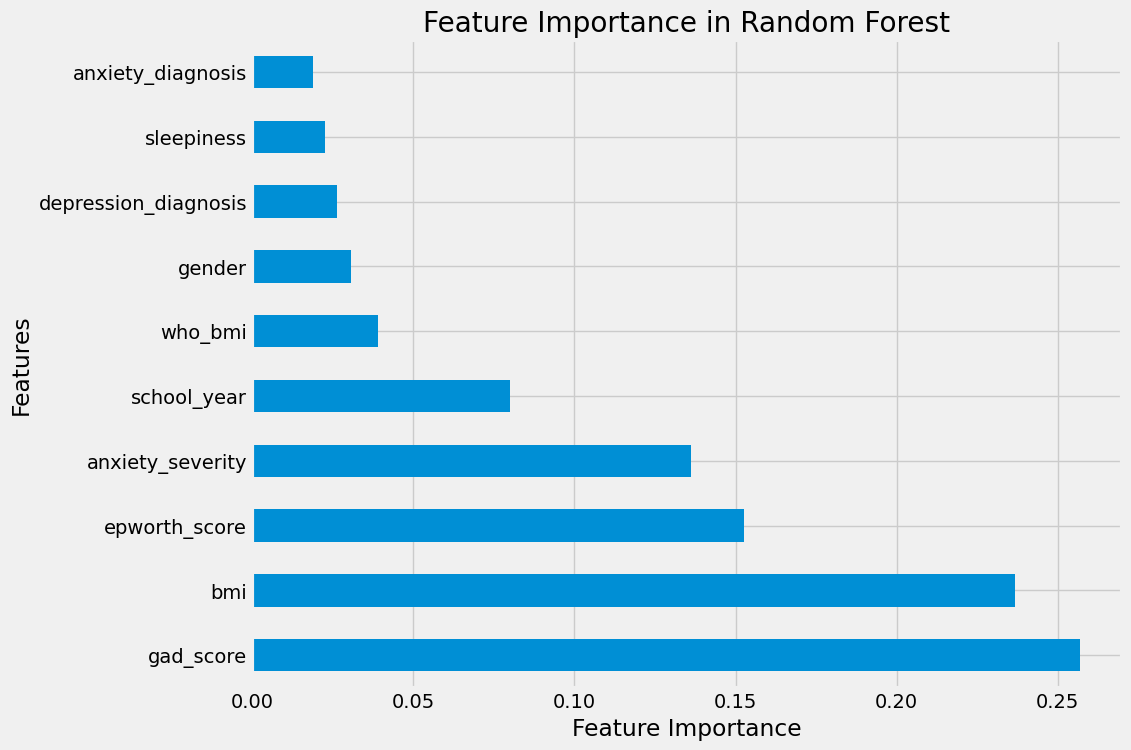

In [181]:

# Feature Importance ermitteln
rf_model = rf_pipe.named_steps['model']

# Extrahieren der Feature-Namen nach der Transformation
preprocessor = rf_pipe.named_steps['pre']
kbest = rf_pipe.named_steps['kbest']
selected_features = kbest.get_support(indices=True)

# Numerische und kategorische Feature-Namen nach der Transformation
num_feature_names = num_2_cols
cat_feature_names = cat_2_cols

# Kombinierte Liste der ursprünglichen Features
all_features = num_feature_names + cat_feature_names

# Ausgewählte Features nach SelectKBest
selected_feature_names = [all_features[i] for i in selected_features]

# Erzeuge eine Serie mit den Feature Importances
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=selected_feature_names)

# Sortiere die Werte und wähle die Top 10 Features aus
top_10_features = feature_importance_rf.nlargest(10)

# Erzeuge ein Balkendiagramm
plt.style.use('fivethirtyeight')
top_10_features.plot(kind='barh', figsize=(10, 8))

# Füge Beschriftungen hinzu
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')

# Zeige das Diagramm an
plt.show()

In [182]:
print(all_features)

['school_year', 'age', 'gender', 'bmi', 'depression_diagnosis', 'gad_score', 'anxiety_diagnosis', 'epworth_score', 'sleepiness', 'anxiety_severity', 'who_bmi']


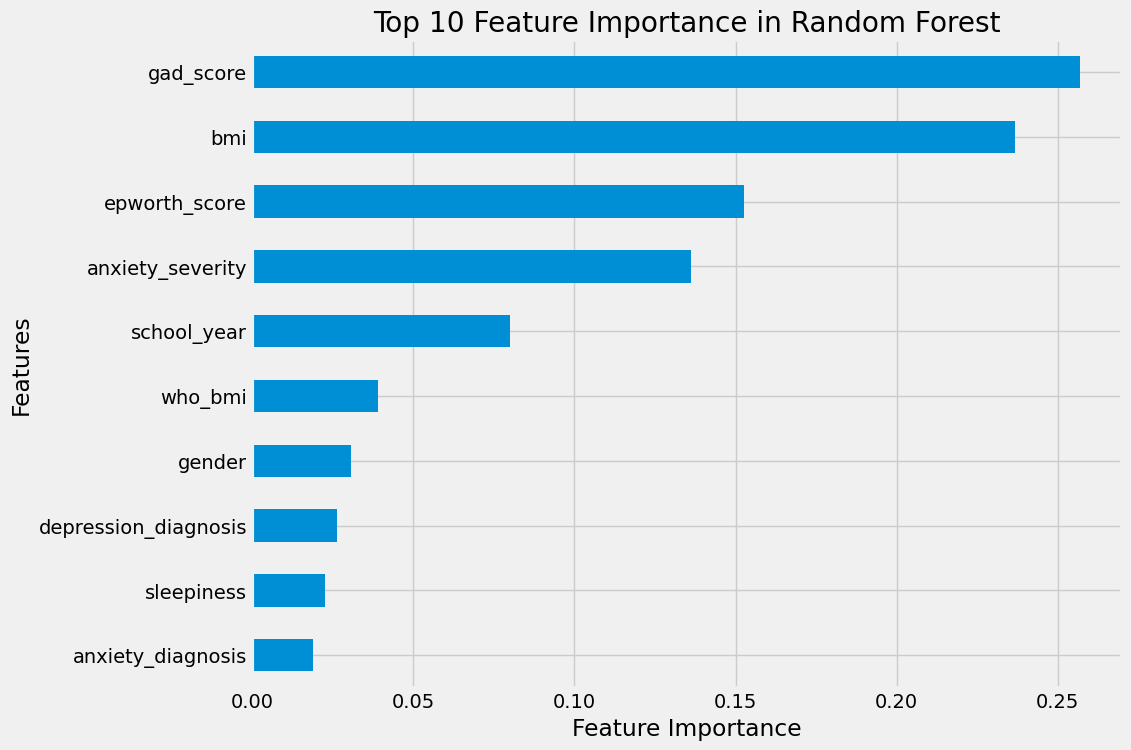

In [183]:

# Sortiere die Werte und wähle die Top 10 Features aus
top_10_features = feature_importance_rf.nlargest(10).sort_values()

# Erzeuge ein Balkendiagramm für die Top 10 Features
plt.style.use('fivethirtyeight')
top_10_features.plot(kind='barh', figsize=(10, 8))

# Füge Beschriftungen hinzu
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance in Random Forest')

# Zeige das Diagramm an
plt.show()

In [184]:



from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier




# Fist Idea of a grid search:

# Modified GridSearch

#class GridSearchCV_mod(GridSearchCV):
#    @timeit
#    def fit(self, X, y=None, **fit_params):
#        return super().fit(X, y, **fit_params)




# Parameter Grid definieren für RF_mod
#param_grid = {
#    'model__n_estimators': [100],  # , 200],  # , 300],
#    'model__max_features': [None, 'sqrt'],  # , 'log2'],
#   'model__max_depth': [10, 20],  # , 30, None],
#    'model__min_samples_split': [2, 5],  # , 10],
#    'model__min_samples_leaf': [2, 4],  # [1, 2, 4]
#    'model__max_samples_leaf': [0.1, 0.2],  # Beispielsweise zwei Werte zur Auswahl
#}

# Parameterraum mit normalem RF
#param_grid = {
#    'model__n_estimators': [100] , # , 200],  # , 300],
#    'model__max_features': [None, 'sqrt'],  # , 'log2'],
#    'model__max_depth': [10, 20],  # , 30, None],
#    'model__min_samples_split': [2, 5],  # , 10],
#    'model__min_samples_leaf': [2, 4],  # [1, 2, 4]
#}

param_grid = {
    'model__n_estimators': [100, 200],  # , 300],
    'model__max_features': ['sqrt', 'log2'],
    'model__max_depth': [10],  # , 30, None],
    'model__min_samples_split': [2, 5],  # , 10],
    'model__min_samples_leaf': [2, 4],  # [1, 2, 4]
}

# GridSearchCV durchführen # opimise the model after precision


#grid_search_rf = GridSearchCV_mod(rf_pipe, param_grid, cv=5, scoring='f1', n_jobs=-1)  # Standard

grid_search_rf = GridSearchCV(rf_pipe, param_grid, cv=5, scoring='f1', n_jobs=-1)  # Standard

#grid_search_rf = GridSearchCV(rf_pipe_mod, param_grid, cv=5, scoring='f1', n_jobs=-1)  # modified

grid_search_rf.fit(features_train, target_train)

# Beste Parameter und Ergebnis anzeigen
print(f'Best parameters: {grid_search_rf.best_params_}')
print(f'Best score: {grid_search_rf.best_score_}')


Best parameters: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best score: 0.6377213606605394


In [185]:
# predict and evaluate on test set

print(classification_report(target_test, grid_search_rf.predict(features_test)))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        54
           1       0.67      0.57      0.62        21

    accuracy                           0.80        75
   macro avg       0.75      0.73      0.74        75
weighted avg       0.79      0.80      0.80        75



In [186]:

# Log the best parameters and the best score
logger.info('GridSearchCV Results')
logger.info(f'Best parameters: {grid_search_rf.best_params_}')
logger.info(f'Best score: {grid_search_rf.best_score_}')

# Predict and evaluate on the test set
y_pred = grid_search_rf.predict(features_test)
classification_rep = classification_report(target_test, y_pred)

# Log the classification report
logger.info('Classification Report on Test Set:')
logger.info("\n" + classification_rep)

# Print to console for quick reference
print(f'Best parameters: {grid_search_rf.best_params_}')
print(f'Best score: {grid_search_rf.best_score_}')
print(classification_report(target_test, y_pred))

print("Results have been logged to 'log\model_evaluation.log'.")

INFO:model_evaluation_logger:GridSearchCV Results
INFO:model_evaluation_logger:Best parameters: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
INFO:model_evaluation_logger:Best score: 0.6377213606605394
INFO:model_evaluation_logger:Classification Report on Test Set:
INFO:model_evaluation_logger:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        54
           1       0.67      0.57      0.62        21

    accuracy                           0.80        75
   macro avg       0.75      0.73      0.74        75
weighted avg       0.79      0.80      0.80        75



Best parameters: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Best score: 0.6377213606605394
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        54
           1       0.67      0.57      0.62        21

    accuracy                           0.80        75
   macro avg       0.75      0.73      0.74        75
weighted avg       0.79      0.80      0.80        75

Results have been logged to 'log\model_evaluation.log'.


In [187]:
# Prediction with an aim-Dataset


#  Example aim-file


# Reading the CSV file into a DataFrame
X_aim = pd.read_csv('aim_test.csv')


# Cleaning data-file
X_aim = clean_data(X_aim)


display(X_aim)
y_pred_aim = grid_search_rf.predict(X_aim)
print(X_aim)
print(y_pred_aim)

# 0 is not depressive
# 1 is depressiv

school_year  age  gender        bmi          who_bmi  phq_score  \
0            1   19       1  33.333333  Class I Obesity          9   
1            1   18       1  19.841270           Normal          8   
2            2   19       0  25.102391       Overweight          8   
3            1   18       0  23.738662           Normal         19   

  depression_severity  depressiveness  suicidal  depression_diagnosis  \
0                Mild           False     False                     0   
1                Mild           False     False                     0   
2                Mild           False     False                     0   
3   Moderately severe            True      True                     0   

   depression_treatment  gad_score anxiety_severity  anxiousness  \
0                     0         11         Moderate         True   
1                     0          5             Mild        False   
2                     0          6             Mild        False   
3                     0         15           Severe         True   

   anxiety_diagnosis  anxiety_treatment  epworth_score  sleepiness  
0                  0              False              7           0  
1                  0              False             14           1  
2                  0              False              6           0  
3                  0              False             11           1

   school_year  age  gender        bmi          who_bmi  phq_score  \
0            1   19       1  33.333333  Class I Obesity          9   
1            1   18       1  19.841270           Normal          8   
2            2   19       0  25.102391       Overweight          8   
3            1   18       0  23.738662           Normal         19   

  depression_severity  depressiveness  suicidal  depression_diagnosis  \
0                Mild           False     False                     0   
1                Mild           False     False                     0   
2                Mild           False     False                     0   
3   Moderately severe            True      True                     0   

   depression_treatment  gad_score anxiety_severity  anxiousness  \
0                     0         11         Moderate         True   
1                     0          5             Mild        False   
2                     0          6             Mild        False   
3          

In [188]:
target_col = 'depressiveness'

print(target_col)


# Sort the values and select the top 10 features
top_10_features_series = feature_importance_rf.nlargest(10).sort_values()

# Convert the top 10 features into a list of tuples
top_10_features = list(top_10_features_series.items())

# Extract just the feature names into a list
top_10_feature_names = top_10_features_series.index.tolist()

# Print the list of top 10 feature names for verification
print("Top 10 Feature Names:", top_10_feature_names)


depressiveness
Top 10 Feature Names: ['anxiety_diagnosis', 'sleepiness', 'depression_diagnosis', 'gender', 'who_bmi', 'school_year', 'anxiety_severity', 'epworth_score', 'bmi', 'gad_score']


In [189]:
import pickle
import pandas as pd


#  Save with pickle


with open('model_depression.pkl', 'wb') as file:
    pickle.dump(grid_search_rf, file)
    pickle.dump(target_col, file)
#    pickle.dump(top_10_feature_names, file)
    pickle.dump(all_features, file)

In [191]:
# Prediction of one Data-Set

import pandas as pd

# Example input data
aim = [19, 33.33, 'Class I Obesity', 0, 0, 1, 1, 0, 7, 'Moderate', 11, 'Mild', 9]

# Define column names
columns = ['age', 'bmi', 'who_bmi', 'sleepiness', 'anxiety_diagnosis', 'gender', 'school_year', 
           'depression_diagnosis', 'epworth_score', 'anxiety_severity', 
           'gad_score', 'depression_severity', 'phq_score']

# Convert aim into a DataFrame
X_aim = pd.DataFrame([aim], columns=columns)



display(X_aim)
y_pred_aim = grid_search_rf.predict(X_aim)
print(X_aim)
print(y_pred_aim)

# 0 is not depressive
# 1 is depressiv


age    bmi          who_bmi  sleepiness  anxiety_diagnosis  gender  \
0   19  33.33  Class I Obesity           0                  0       1   

   school_year  depression_diagnosis  epworth_score anxiety_severity  \
0            1                     0              7         Moderate   

   gad_score depression_severity  phq_score  
0         11                Mild          9

   age    bmi          who_bmi  sleepiness  anxiety_diagnosis  gender  \
0   19  33.33  Class I Obesity           0                  0       1   

   school_year  depression_diagnosis  epworth_score anxiety_severity  \
0            1                     0              7         Moderate   

   gad_score depression_severity  phq_score  
0         11                Mild          9  
[0]
